In [1]:
# Importamos los tres paquetes necesarios

import numpy as np
from scipy.integrate import dblquad
from matplotlib import pyplot as plt

# Fijamos los valores del problema

# Dimensiones de la placa
A = 10.0
B = 10.0

# Conductividad térmica del material
K = 1.0

# Tiempo final
T_INI = 0.0
T_FIN = 2.0

# Número de sumandos de cada serie
MAX_N = 10
MAX_M = 10

N_PUNTOS_X = 100  # Número de puntos en la dimensión espacial x.
N_PUNTOS_Y = 100  # Número de puntos en la dimensión espacial y.
N_PUNTOS_T = 100  # Número de puntos en la dimensión temporat t.

In [2]:
# Definimos la función usum

def usum(x, y, t, m, n):
    """
    Calcula el término individual dentro del sumatorio doble de la solución en serie de Fourier,
    excluyendo el coeficiente Cmn.

    Parámetros:
    x (float): Coordenada en la dirección x.
    y (float): Coordenada en la dirección y.
    t (float): Tiempo en el cual se evalúa la solución.
    m (int): Índice de la serie en la dirección y.
    n (int): Índice de la serie en la dirección x.

    Retorna:
    float: Valor del término de la serie en la posición (x, y) en el instante t.
    """
    exponente = -((n * np.pi / A)**2 + (m * np.pi / B)**2) * K * t
    term_time = np.exp(exponente)
    term_x = np.sin(n * np.pi * x / A)
    term_y = np.sin(m * np.pi * y / B)
    return term_time * term_x * term_y

# Definimos las funciones f y Cmn

def f(x, y, a, b):
    """
    Función de temperatura inicial en la placa.

    Parámetros:
    x (float): Coordenada en la dirección x.
    y (float): Coordenada en la dirección y.
    a (float): Ancho de la placa (x máximo).
    b (float): Alto de la placa (y máximo).

    Retorna:
    float: Temperatura en el punto (x, y) en el tiempo t=0.
    """
    return 10.0 * np.exp(-((x - a / 4)**2 + (y - b / 2)**2))

def Cmn(x, y, m, n):
    """
    Calcula el coeficiente Cmn de la serie de Fourier para la solución de la ecuación de difusión del calor.

    Parámetros:
    x (float): Coordenada en la dirección x.
    y (float): Coordenada en la dirección y.
    m (int): Índice de la serie en la dirección y.
    n (int): Índice de la serie en la dirección x.

    Retorna:
    float: Valor del coeficiente Cmn que ajusta la contribución de cada término en la serie.
    """

    # Definición de la función lambda que usarems para calcular la integral
    func = lambda x, y, a, b, m, n: f(x, y, a, b) * np.sin(n * np.pi * x / a) * np.sin(m * np.pi * y / b)

    # Cálculo de la integral
    integral, abserr = dblquad(func, 0, A, lambda x: 0, lambda x: B, args=(A, B, m, n))
    
    return (4 / (A * B)) * integral

# Definimos la función u

def u(x, y, t):
    """
    Calcula la aproximación de la solución de la ecuación de difusión del calor.

    Parámetros:
    x (float): Coordenada en la dirección x.
    y (float): Coordenada en la dirección y.
    t (float): Tiempo en el cual se evalúa la solución.

    Retorna:
    float: Temperatura en el punto (x, y) en el instante t.
    """
    suma = 0
    for n in range(1, MAX_N + 1):
        for m in range(1, MAX_M + 1):
            suma += usum(x, y, t, m, n) * Cmn(x, y, m, n)

    return suma

In [3]:
#~ # Definimos la función condición inicial u(x,y,0)=f(x,y)
#~ f = lambda x, y, a, b: 10*np.exp(-((x-a/4)**2+(y-b/2)**2))

#~ #Definimos la función usum
#~ def usum(x,y,t,m,n):
#~     '''
#~     Esta función devuelve el elemento dentro del sumatorio doble de la solución en forma de serie
#~     salvo el factor Cm,n
#~     PARÁMETROS:
#~     x,y: coordenadas espaciales
#~     t: coordenada temporal
#~     m,n: parámetros de Cm,n
#~     '''
#~     exponente=-((n*np.pi/A)**2+(m*np.pi/B)**2)*K*t
#~     trig_1=np.sin(n*np.pi*x/A)
#~     trig_2=np.sin(m*np.pi*y/B)
#~     return np.exp(exponente)*trig_1*trig_2

#~ #Definimos la función Cmn
#~ def Cmn(x,y,m,n):
#~     '''
#~     Esta función devuelve el factor Cmn del sumatorio doble
#~     PARÁMETROS:
#~     x,y: coordenadas espaciales
#~     m,n: parámetros propios de este factor
#~     '''
#~     #Definimos la función que va dentro de la integral doble
#~     I_f=lambda x,y,a,b,m,n: f(x,y,a,b)*np.sin(n*np.pi*x/a)*np.sin(m*np.pi*y/b)
#~ 
#~     # Cálculo de la integral
#~     I = dblquad(I_f, 0, A, 0, B, args=(A,B,m,n))[0]
#~ 
#~     return (4/(A*B))*I

#~ #Definimos la función u 
#~ def u(x,y,t):
#~     '''
#~     Esta función calcula la aproximación de la solución 
#~     a partir de las funciones anteriores.
#~     '''
#~     solucion=0
#~     for i in range(1,MAX_N+1):
#~         for j in range(1,MAX_M+1):
#~             solucion+=usum(x,y,t,j,i)*Cmn(x,y,j,i)
#~     
#~     return solucion


Dimensiones de X: (100, 100, 100)
Dimensiones de Y: (100, 100, 100)
Dimensiones de T: (100, 100, 100)


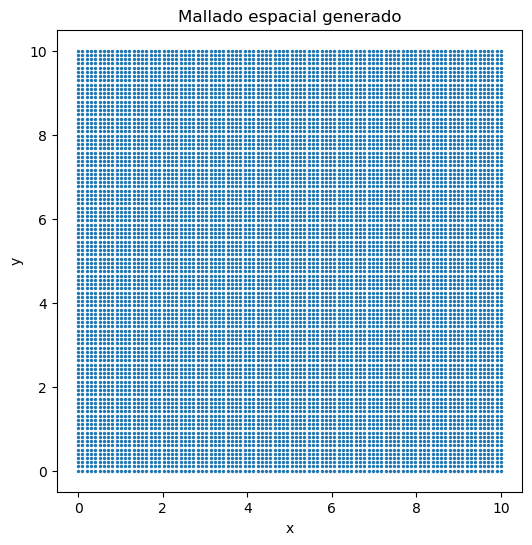

In [4]:
# Creamos los arrays correspondientes a las variables espaciales y a la variable temporal.
# A partir de ellos utilizamos la orden meshgrid para obtener las matrices coordenadas del
# correspondiente mallado

# Creamos los arrays de variables espaciales y temporales
x_vals = np.linspace(0, A,     N_PUNTOS_X)  # Discretización en x
y_vals = np.linspace(0, B,     N_PUNTOS_Y)  # Discretización en y
t_vals = np.linspace(0, T_FIN, N_PUNTOS_T)  # Discretización en tiempo

# Generamos el mallado usando meshgrid
X, Y, T = np.meshgrid(x_vals, y_vals, t_vals)

# Mostramos las dimensiones de los arrays generados
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de Y: {Y.shape}")
print(f"Dimensiones de T: {T.shape}")

# Visualización del mallado espacial
plt.figure(figsize=(6,6))
plt.scatter(X[:, :, 0], Y[:, :, 0], s=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mallado espacial generado")
plt.show()

In [5]:
# Evaluamos la temperatura en toda la malla
U = u(X, Y, T)

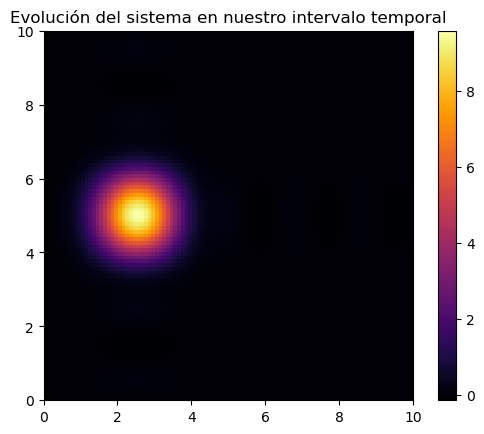

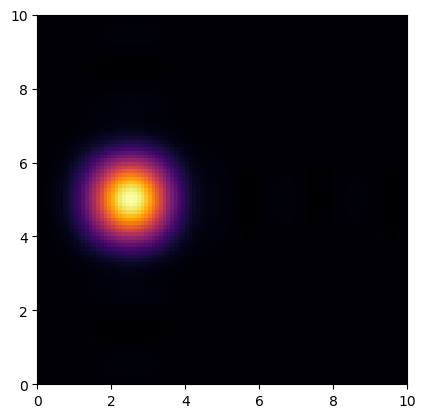

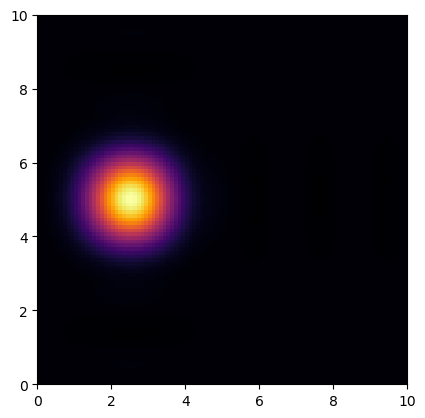

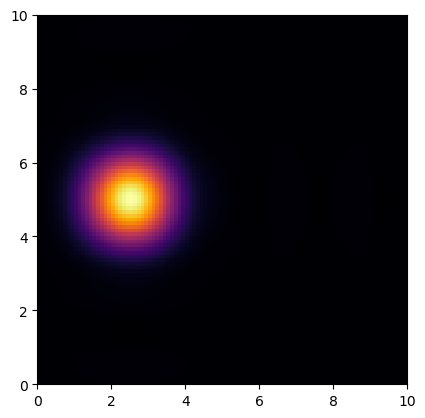

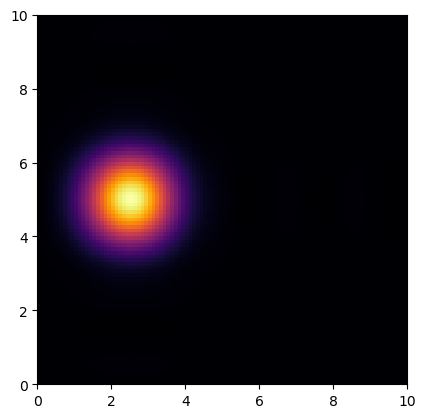

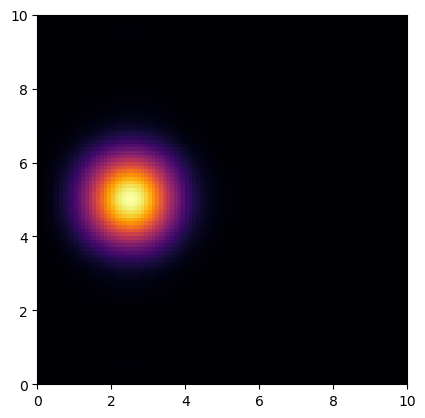

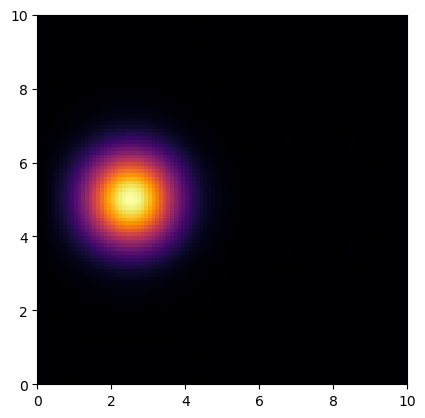

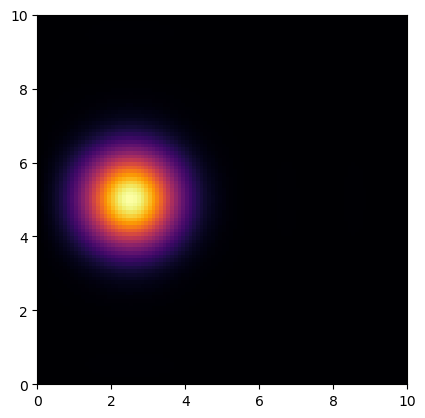

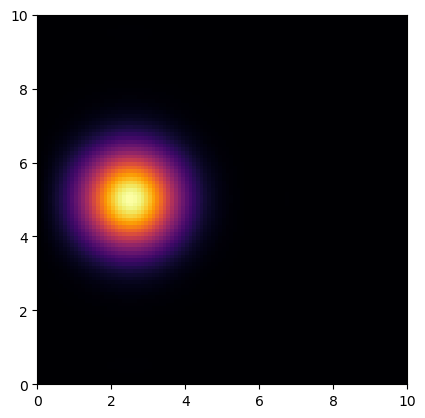

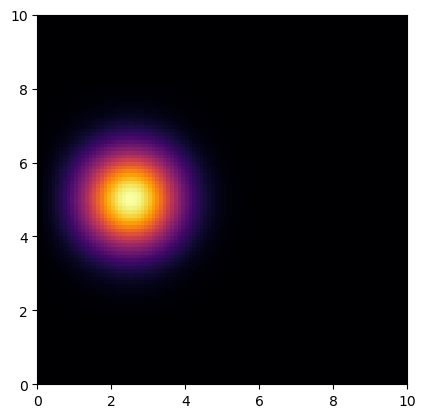

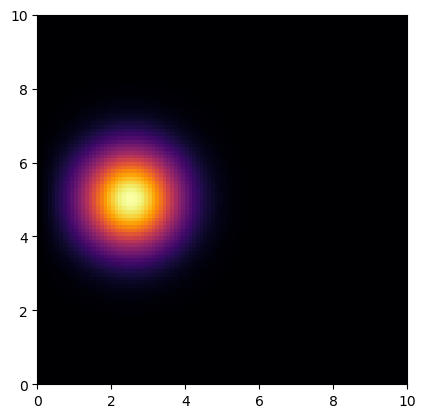

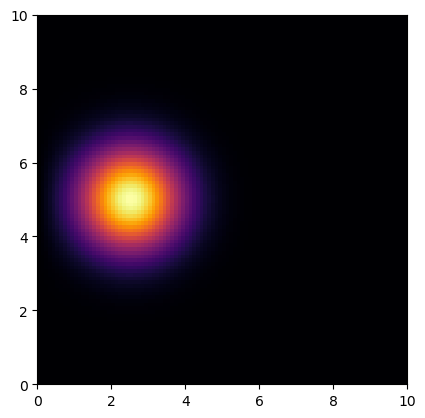

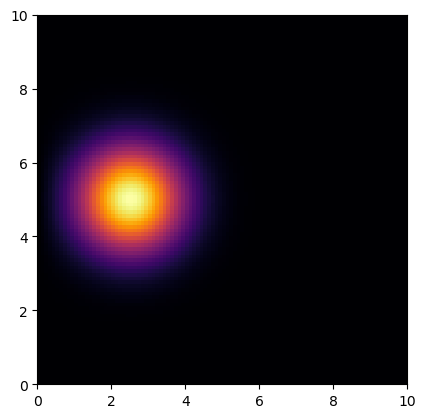

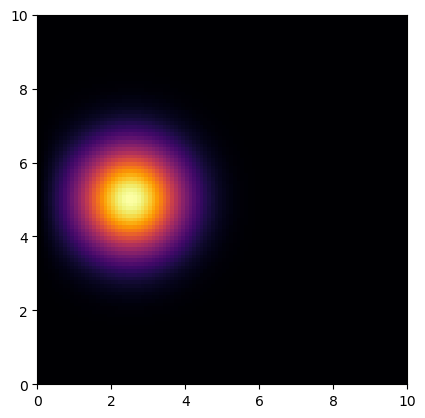

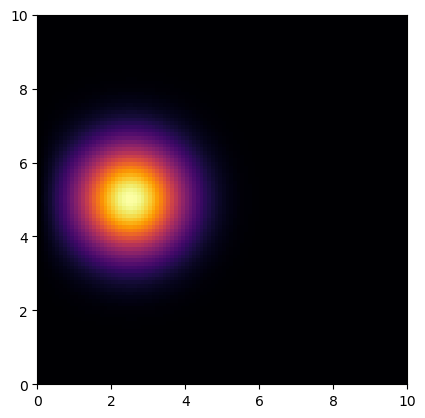

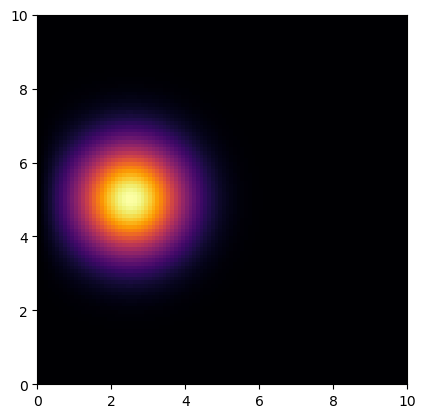

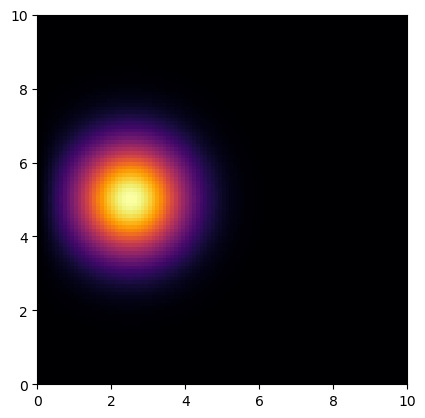

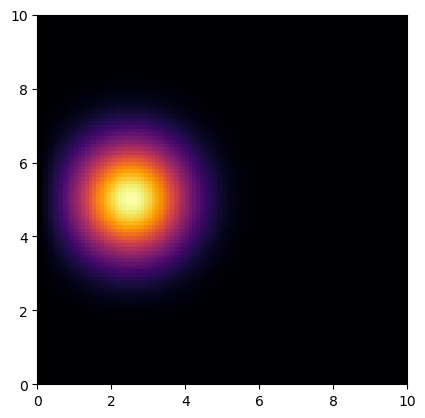

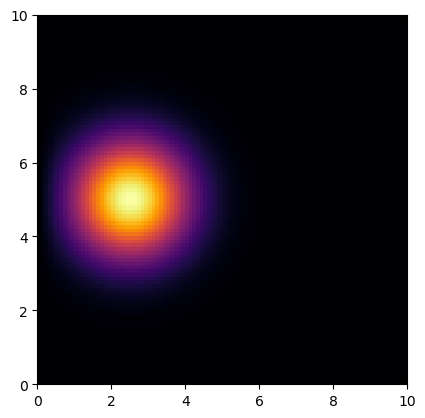

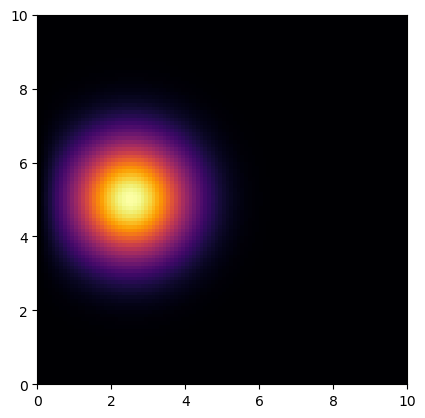

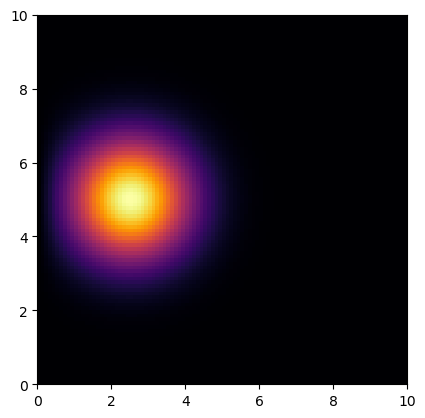

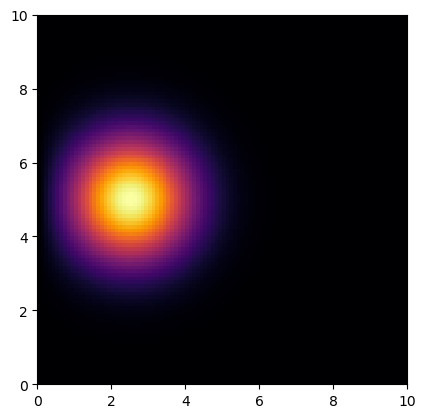

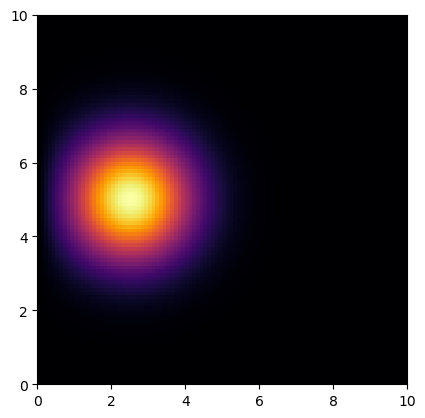

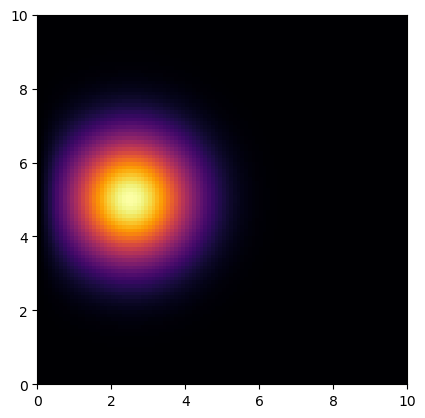

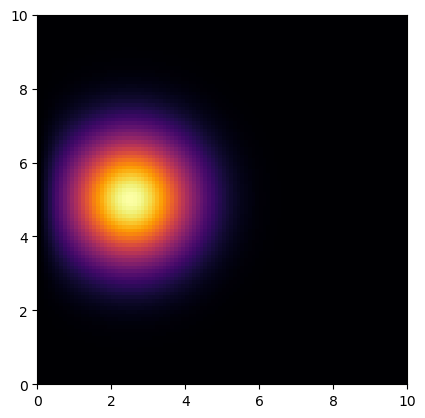

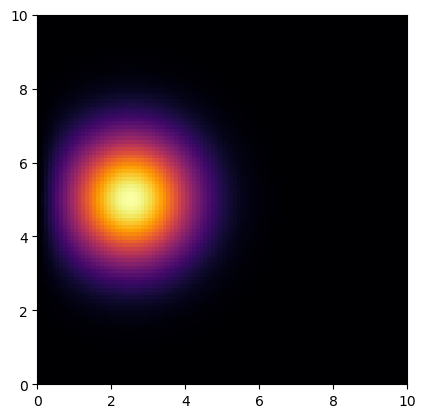

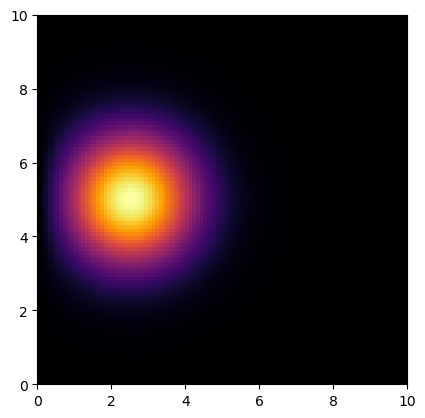

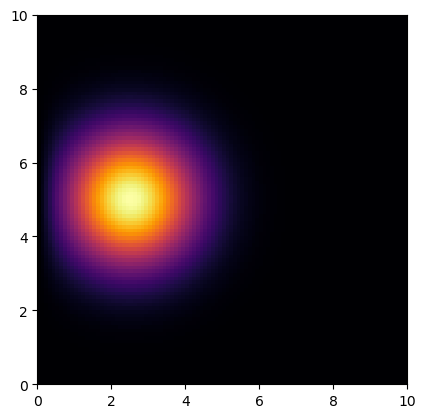

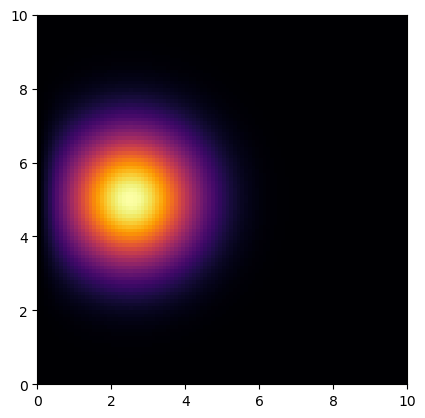

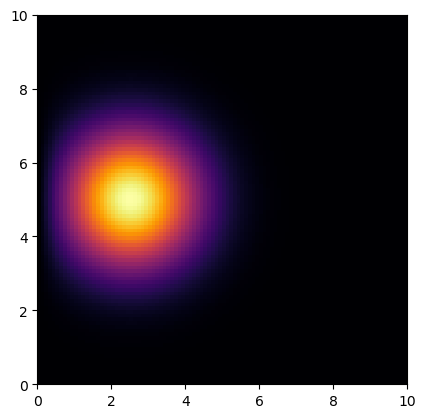

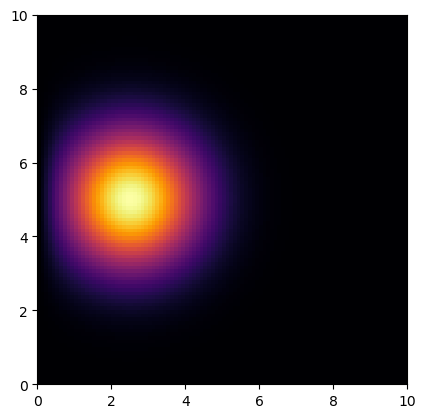

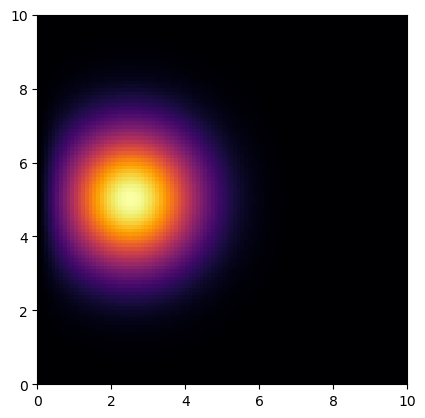

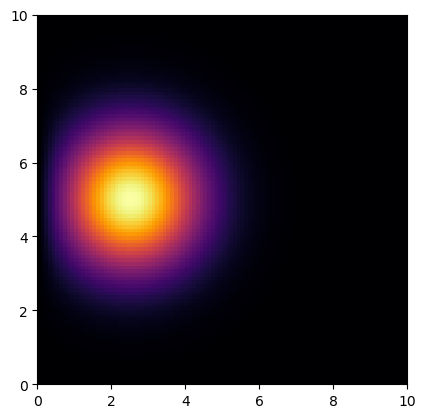

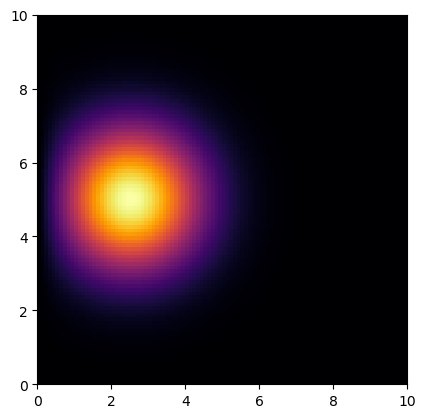

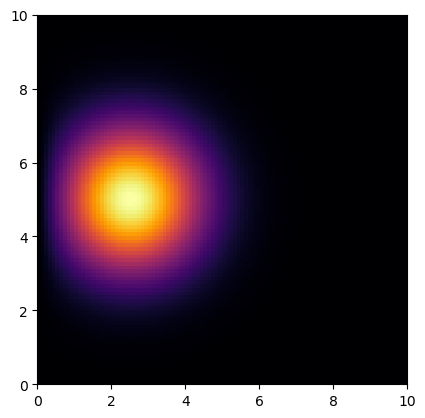

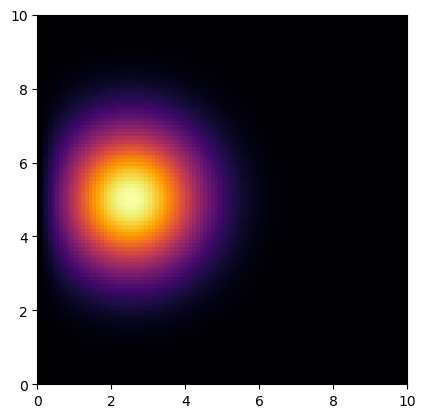

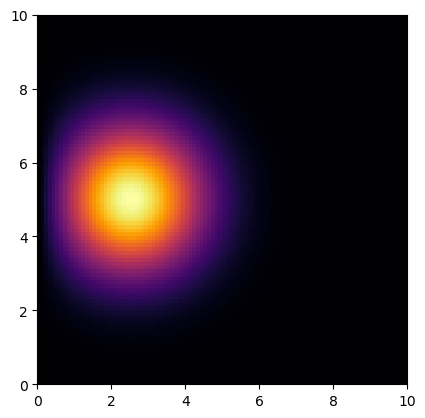

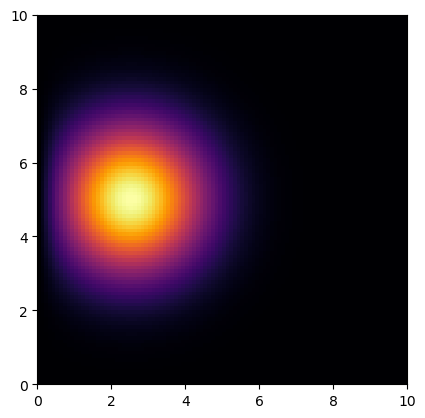

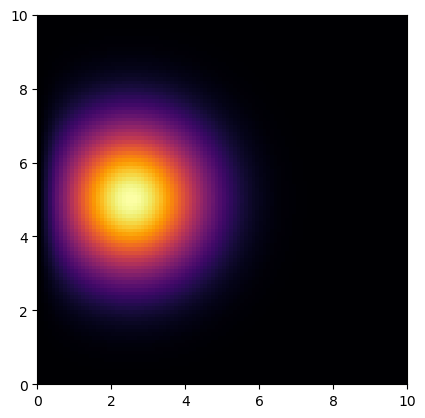

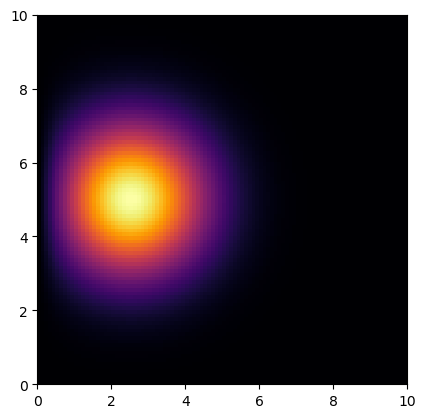

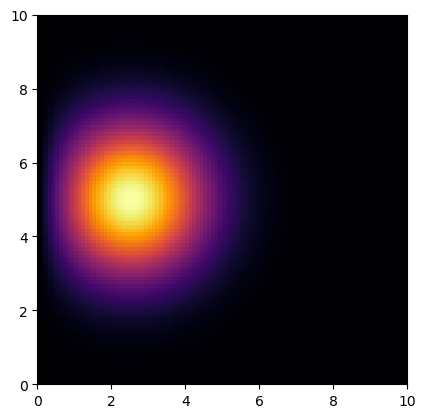

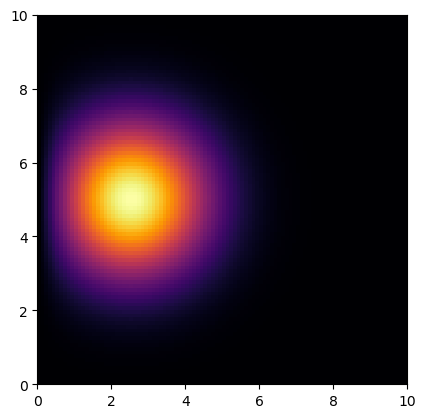

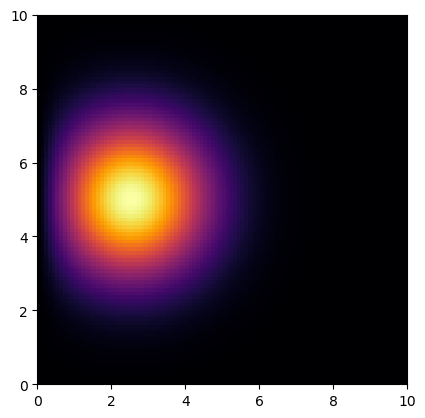

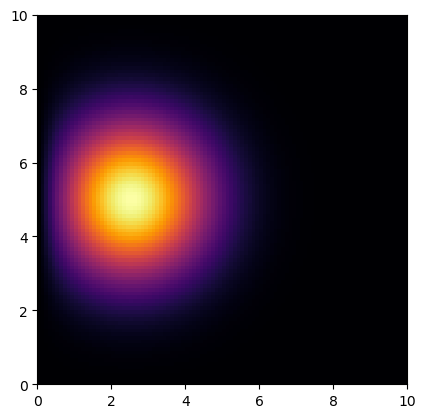

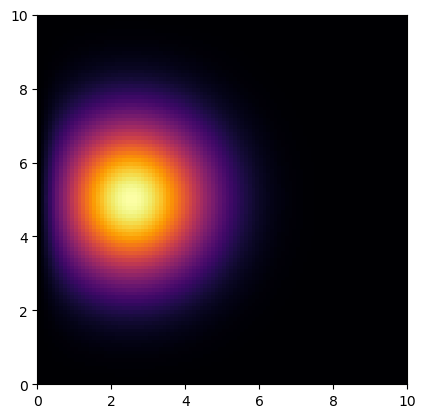

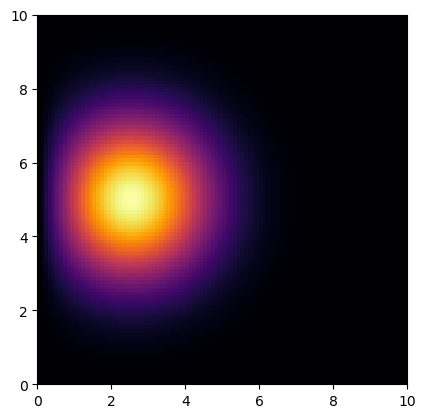

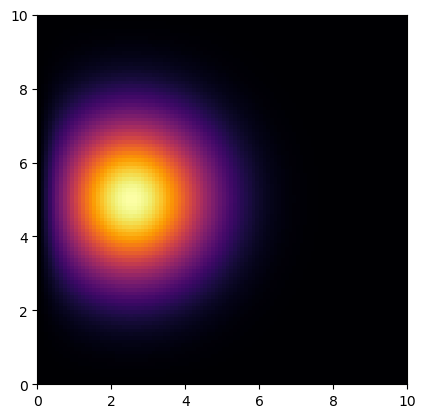

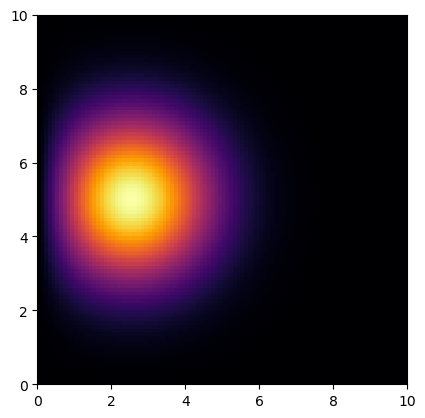

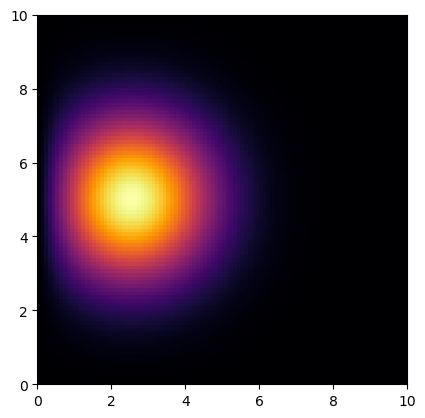

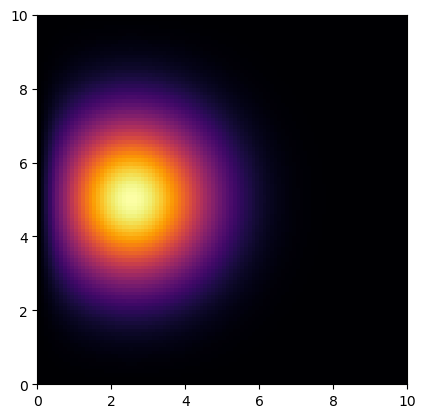

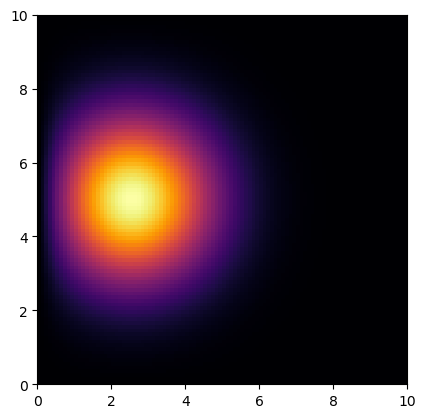

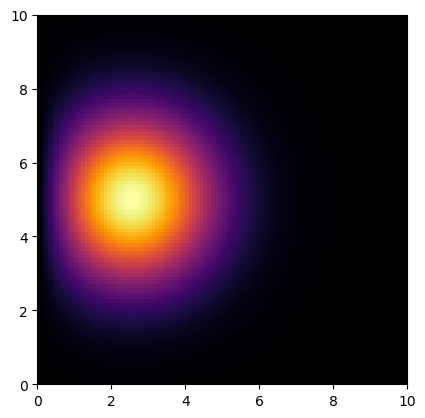

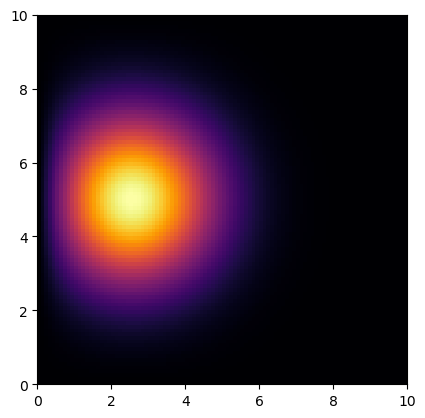

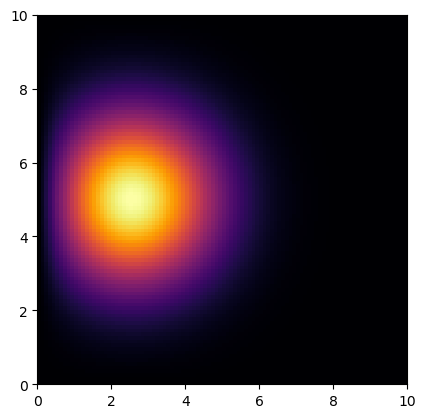

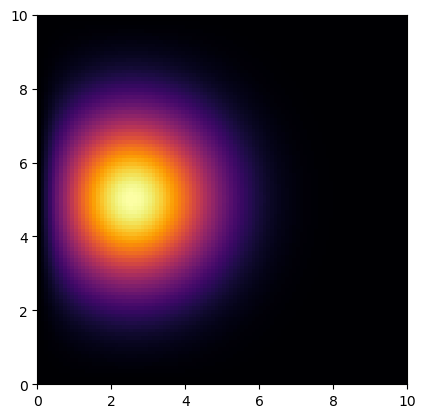

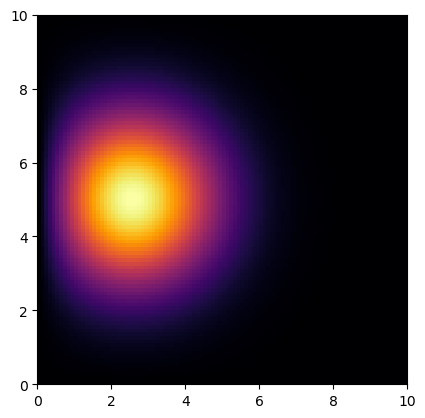

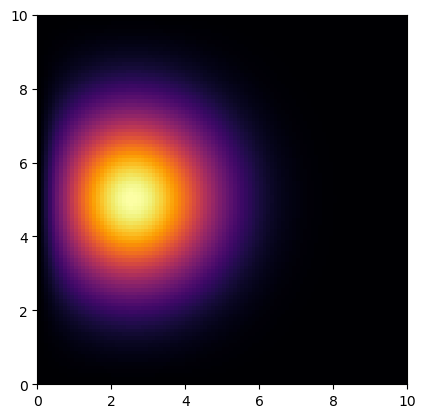

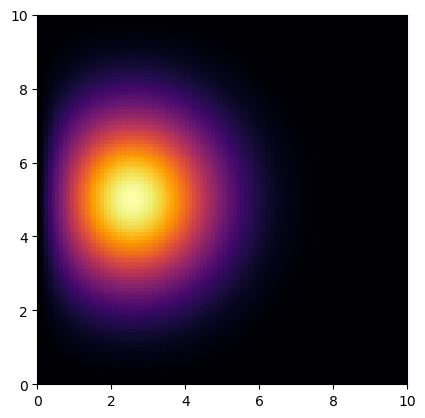

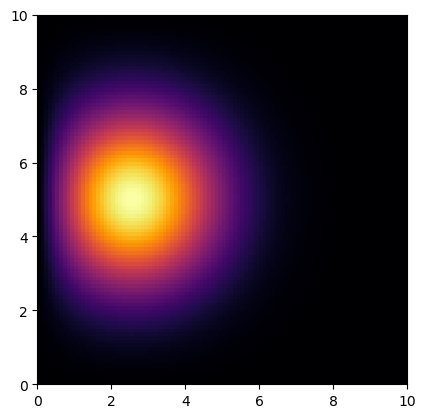

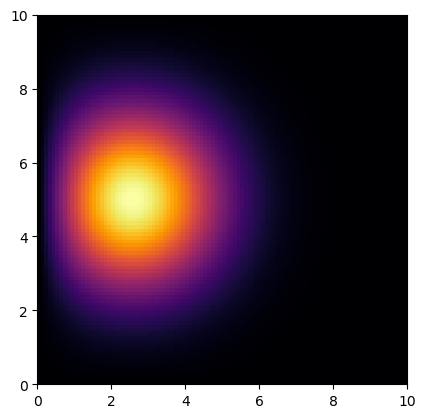

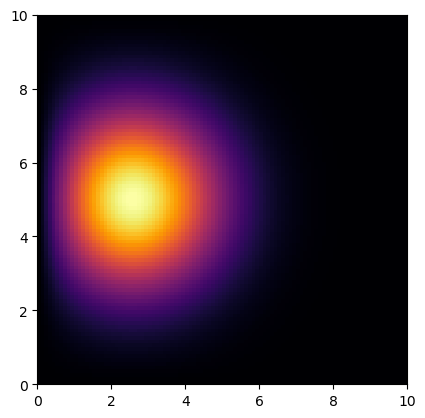

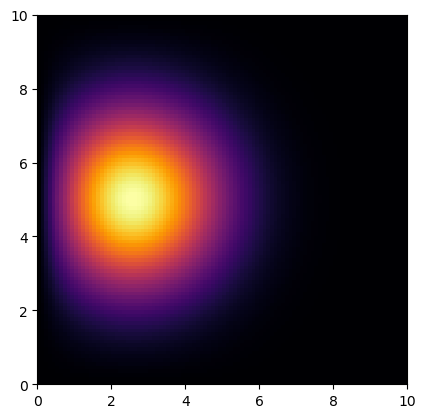

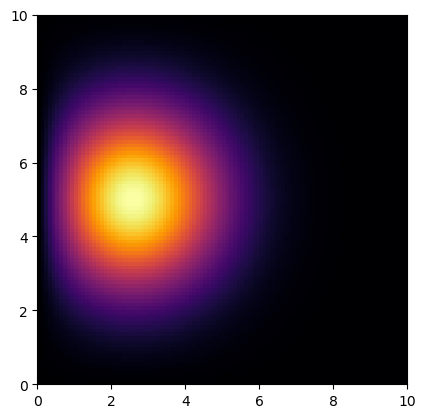

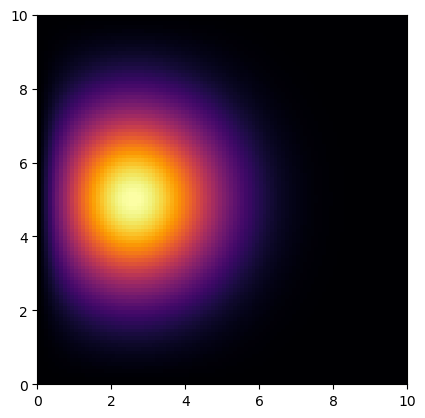

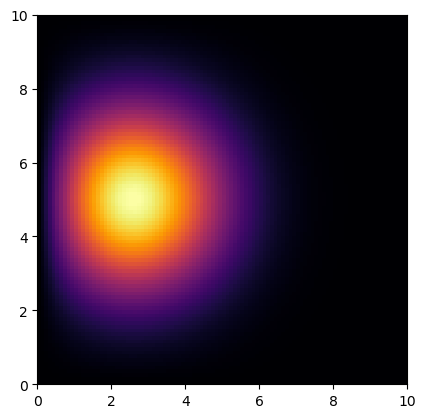

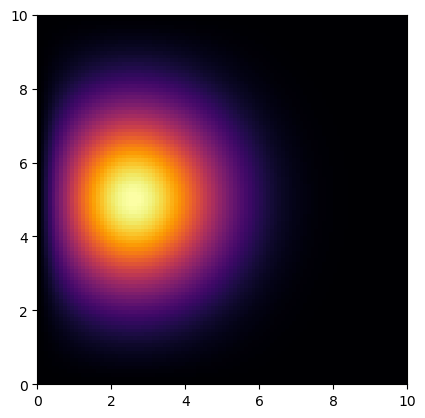

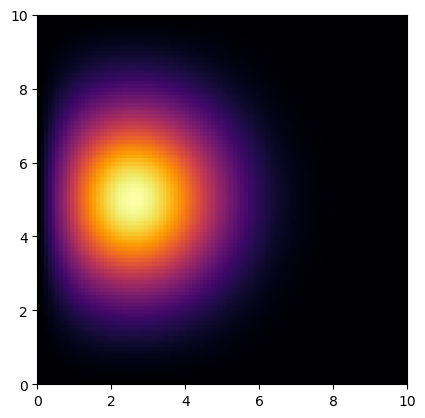

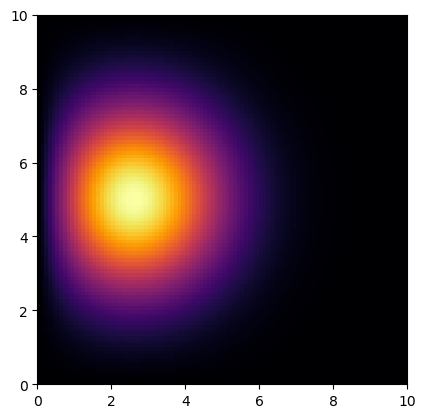

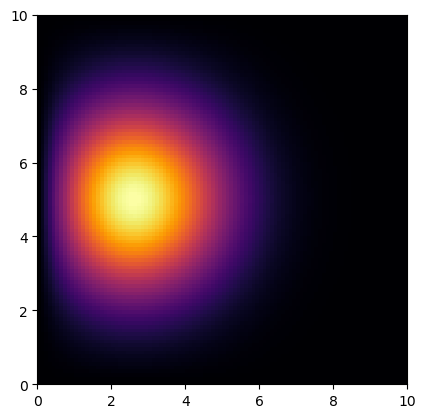

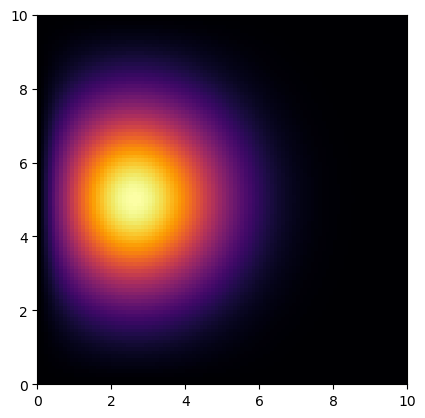

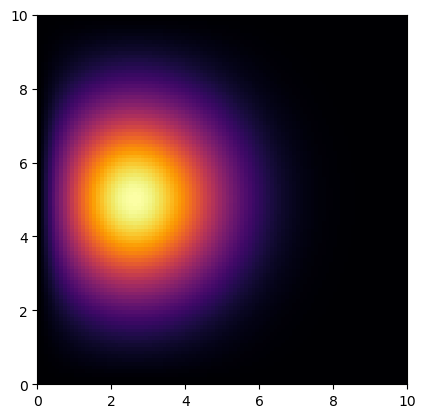

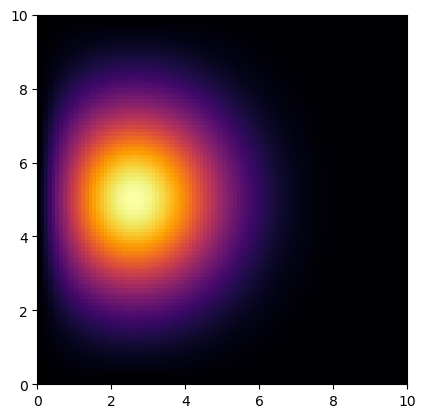

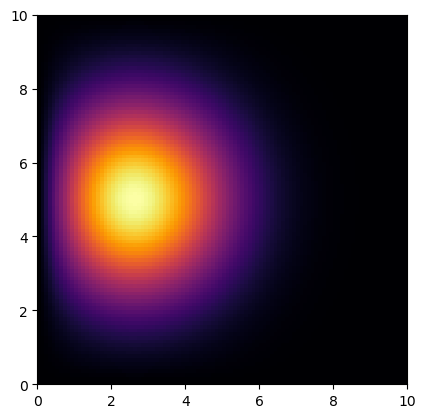

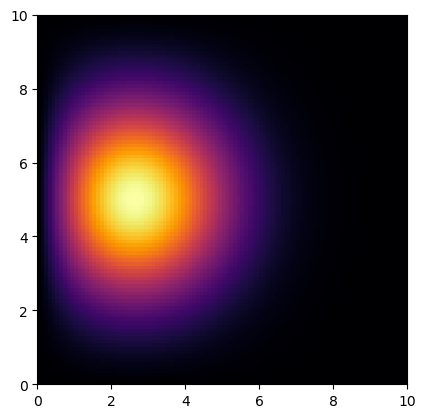

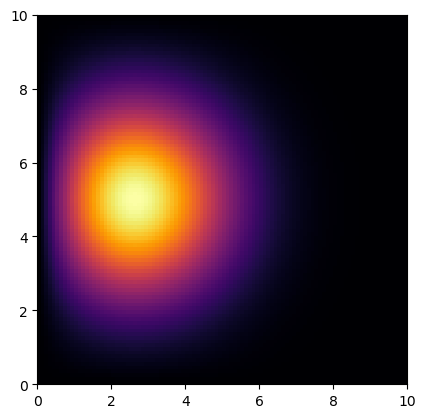

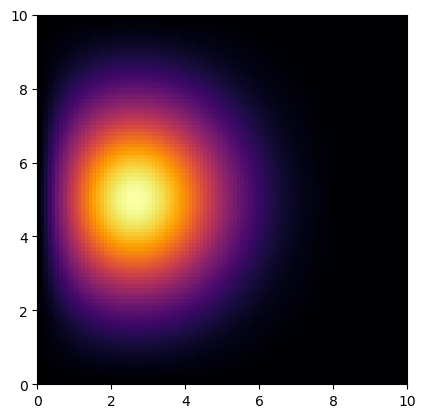

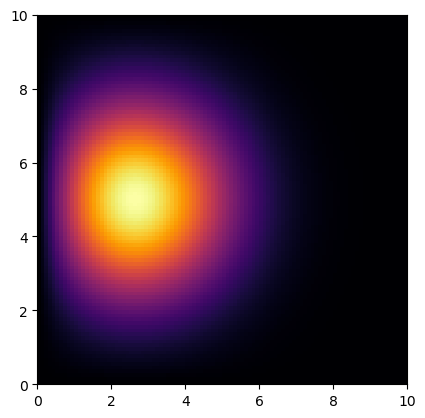

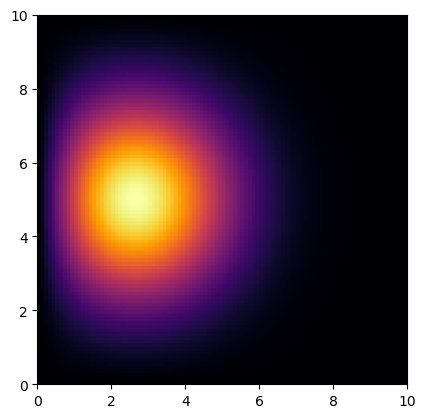

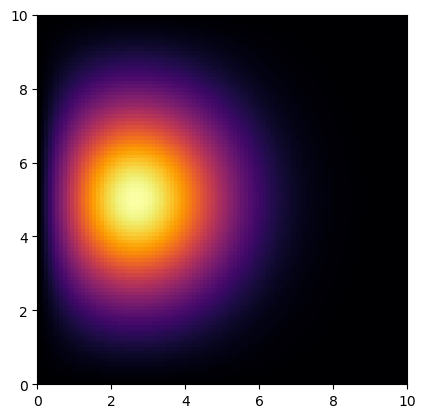

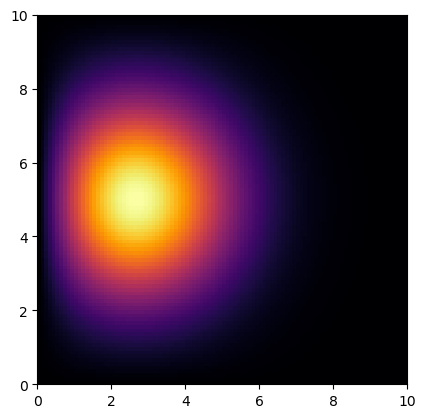

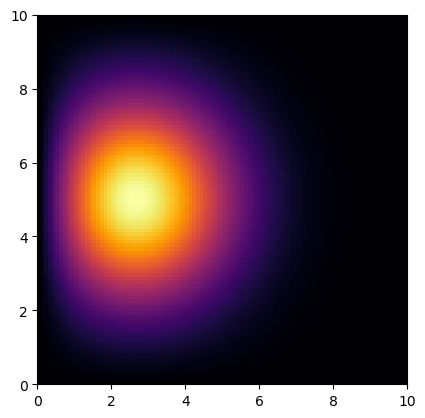

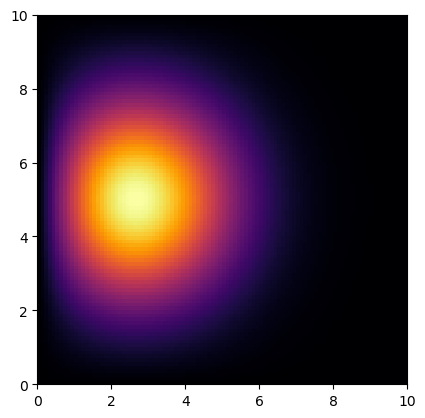

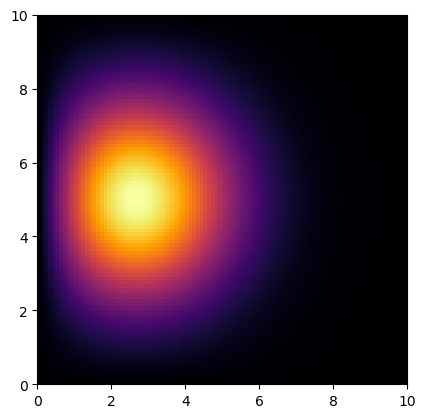

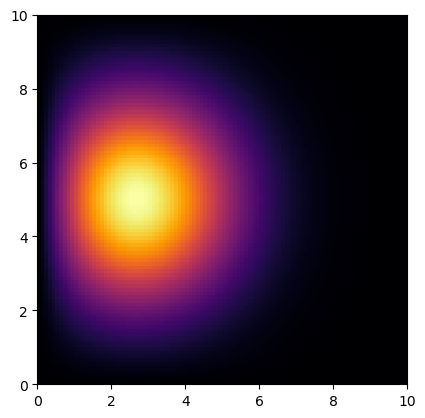

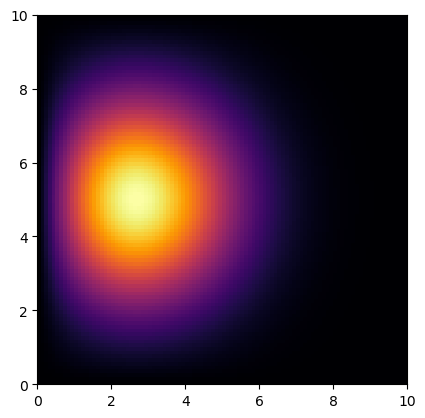

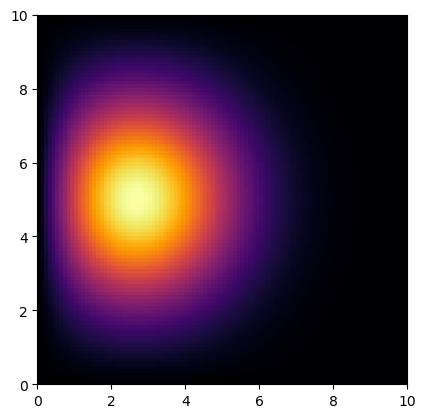

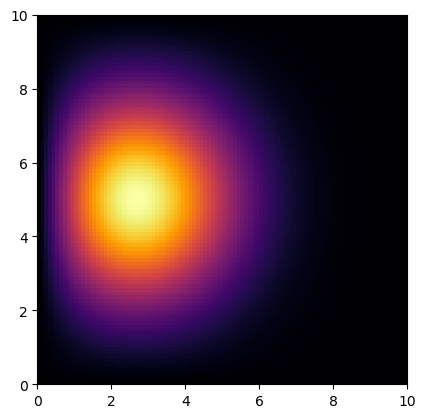

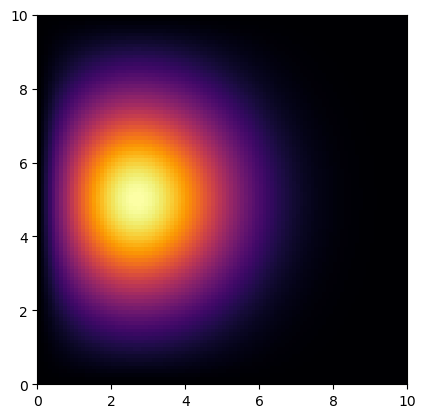

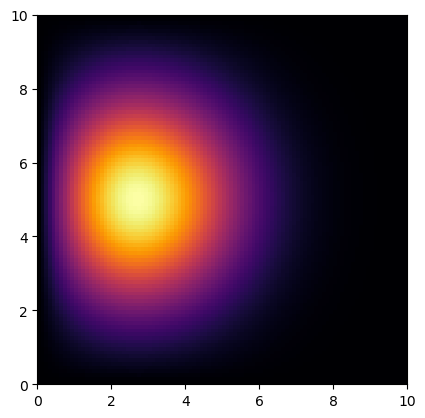

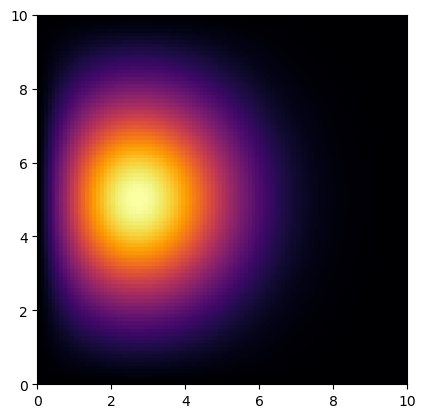

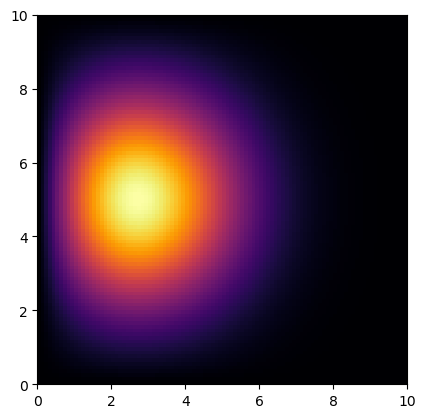

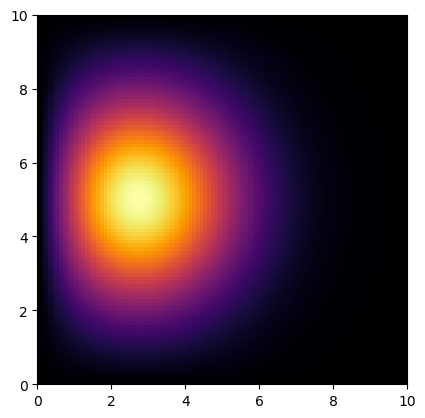

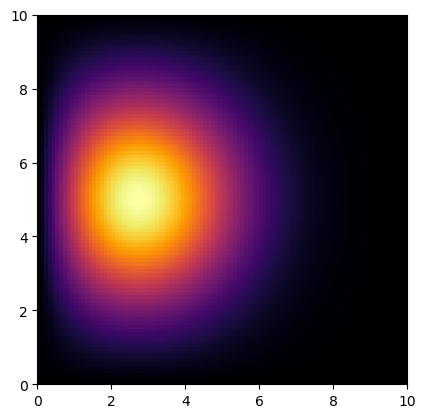

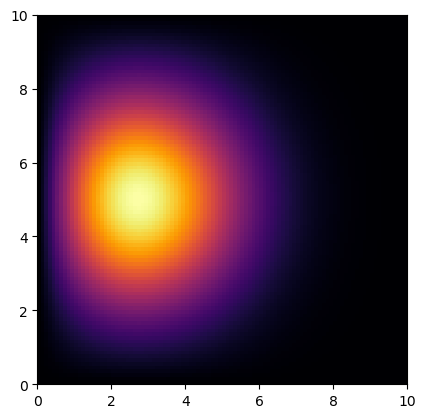

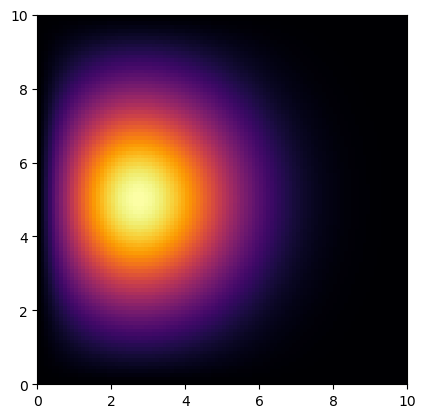

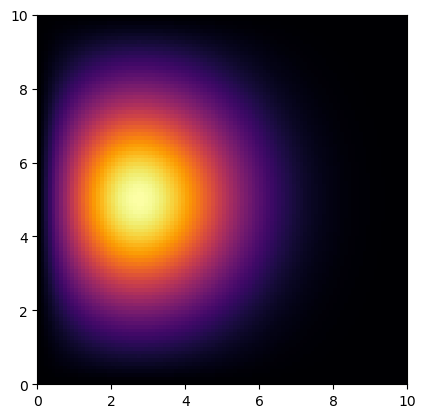

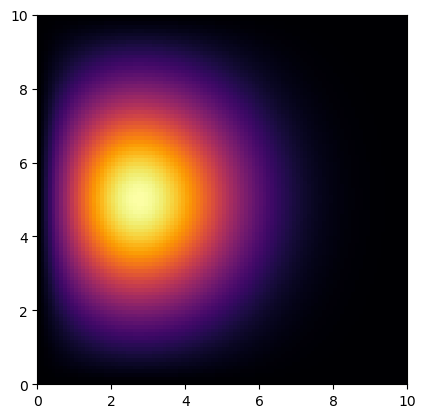

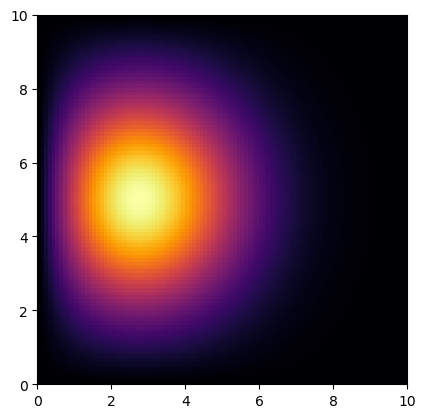

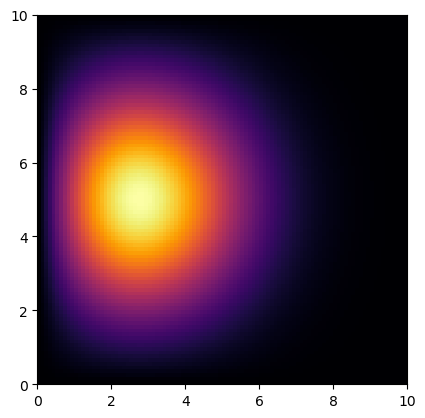

In [6]:
# Hacemos la representación
plt.figure()
plt.title("Evolución del sistema en nuestro intervalo temporal")
plt.xlim(0, A)
plt.ylim(0, B)

# Representaciones auxiliares
p = plt.imshow(U[:, :, 0], cmap='inferno', extent=[0, A, 0, B], origin='lower')
cbar = plt.colorbar()  

# En cada paso, borramos la imagen anterior y mostramos la nueva
for i in range(1, N_PUNTOS_T):
    p.remove()
    p = plt.imshow(U[:, :, i], cmap='inferno', extent=[0, A, 0, B], origin='lower')
    plt.pause(0.05)
plt.show()  

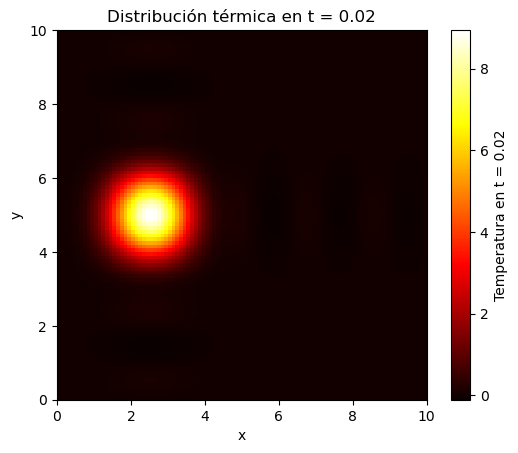

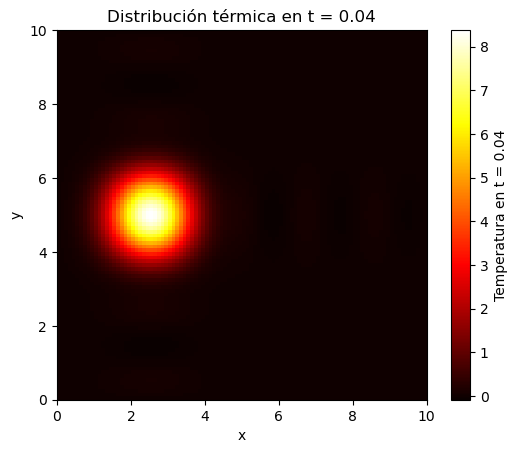

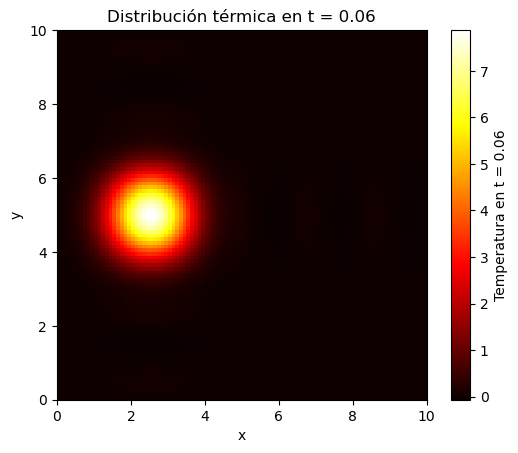

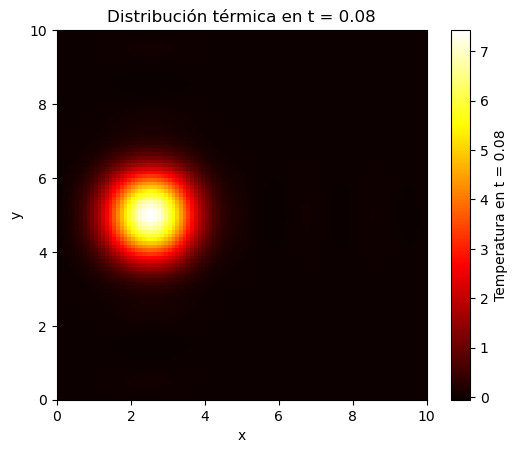

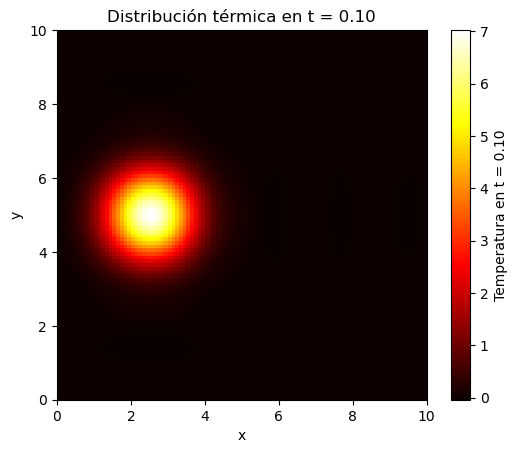

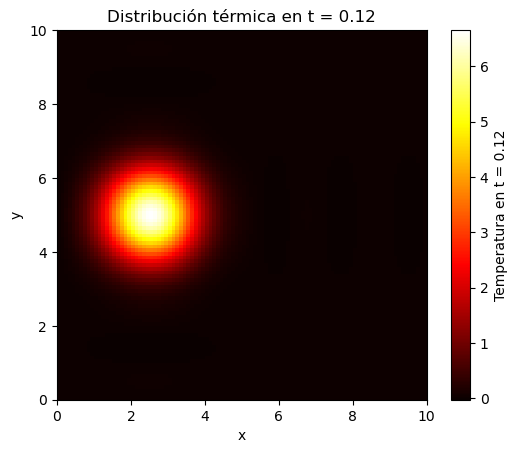

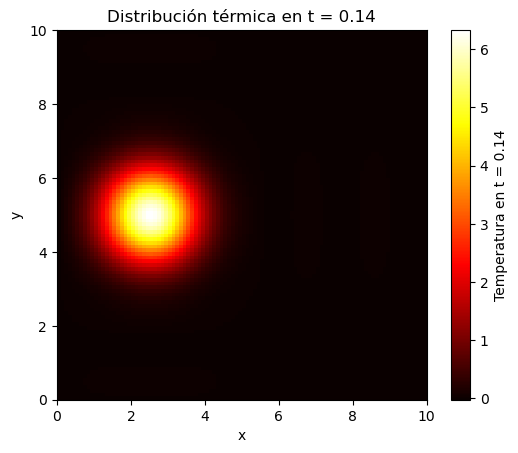

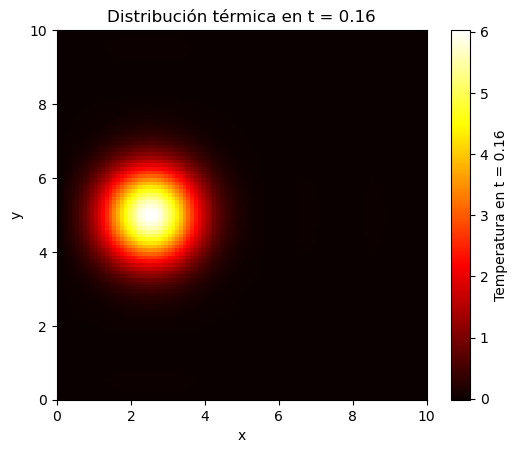

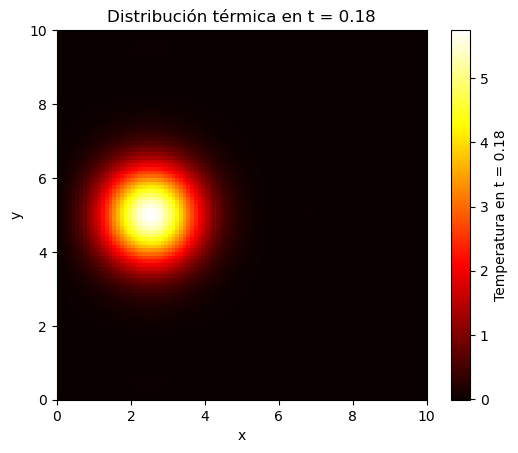

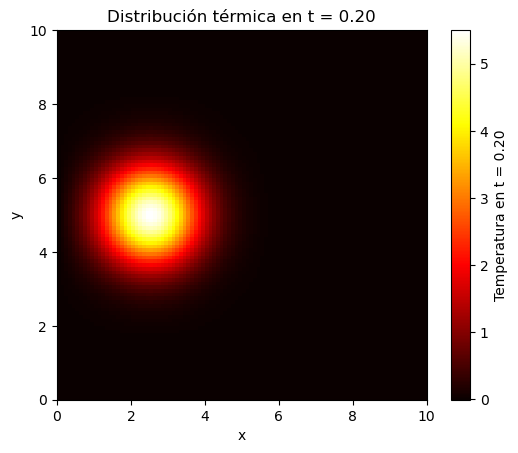

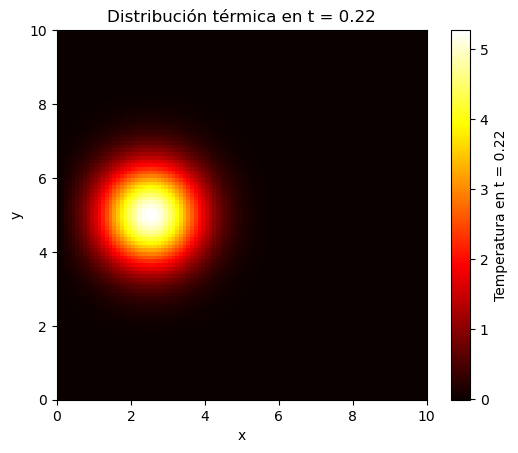

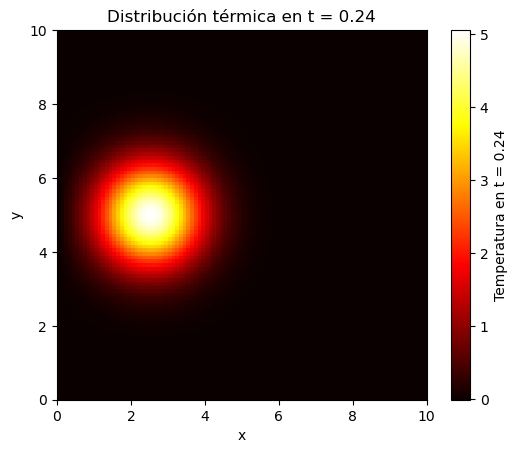

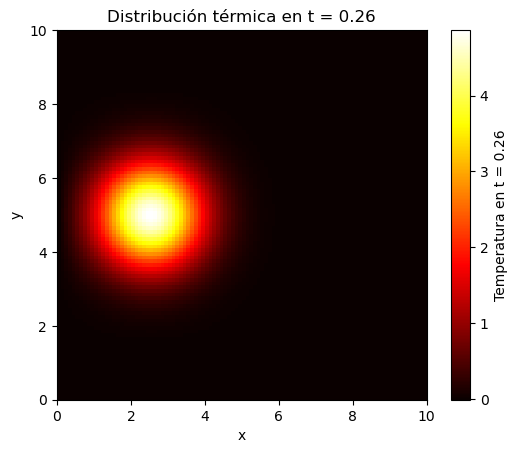

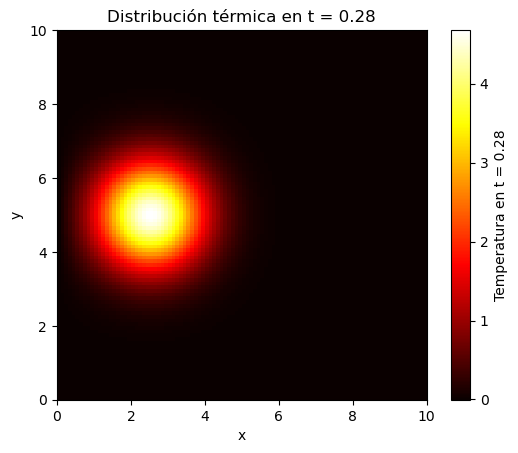

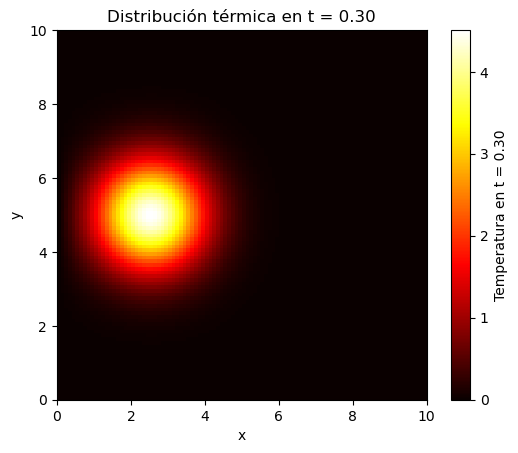

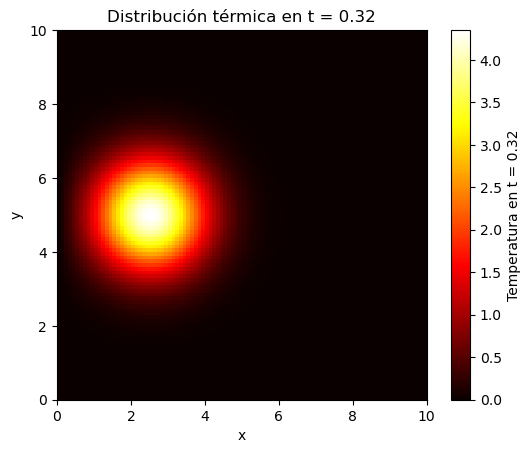

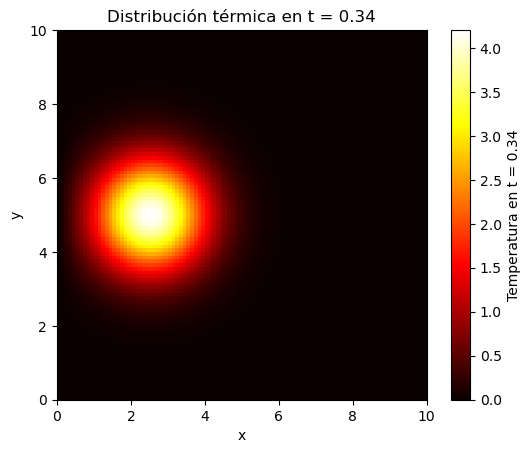

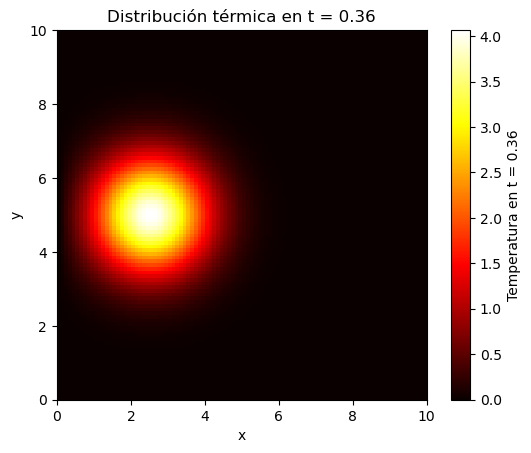

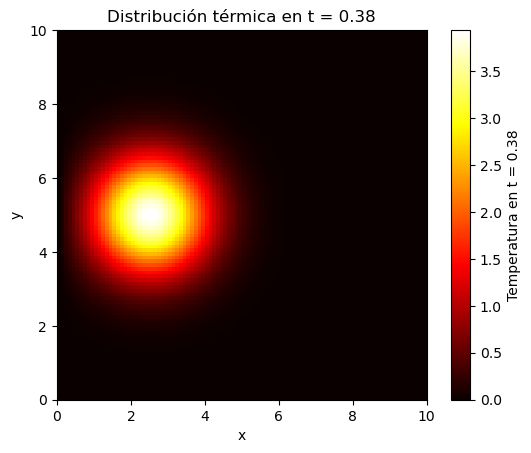

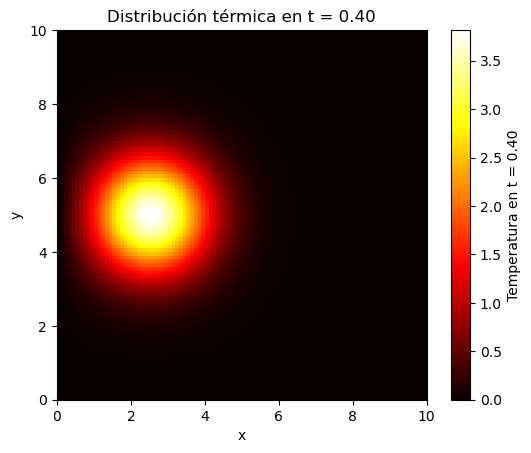

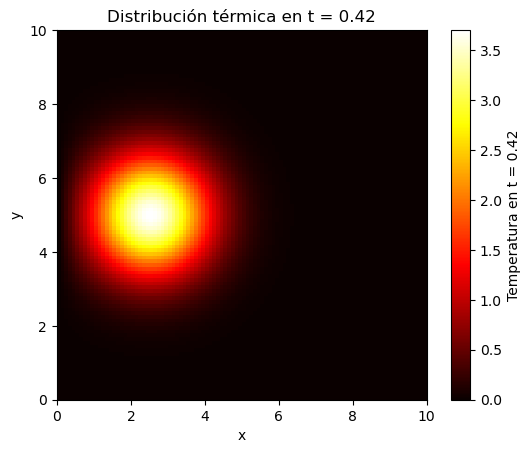

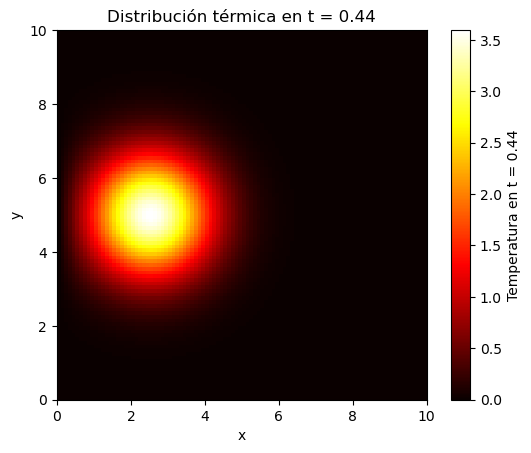

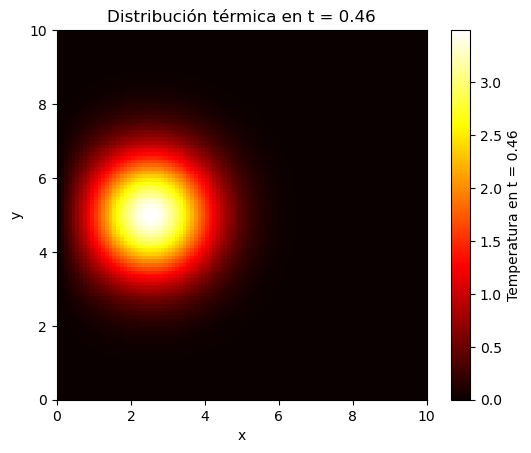

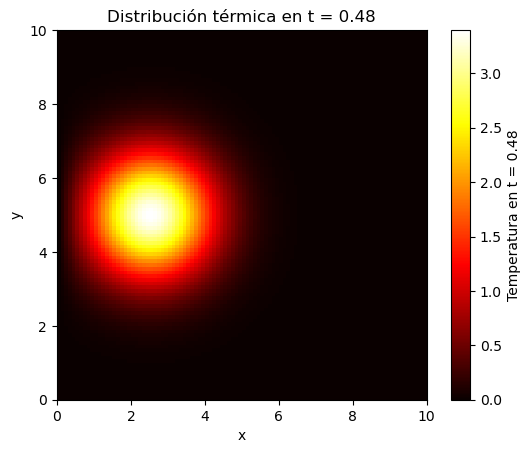

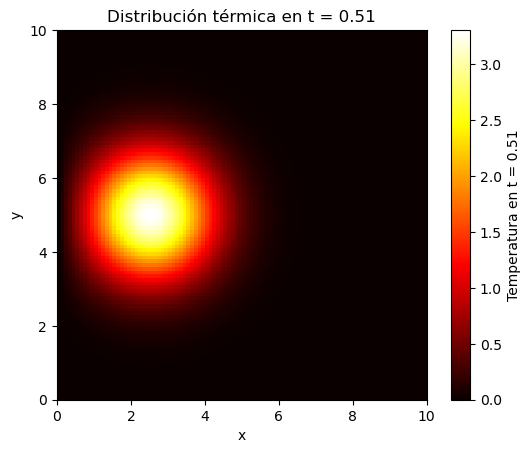

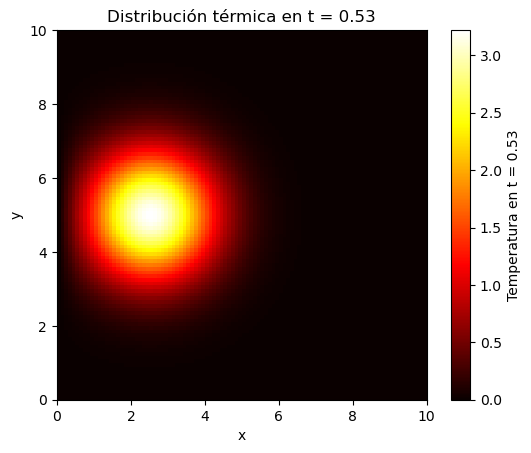

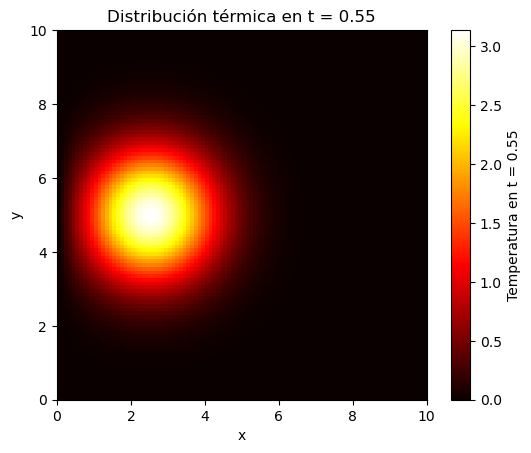

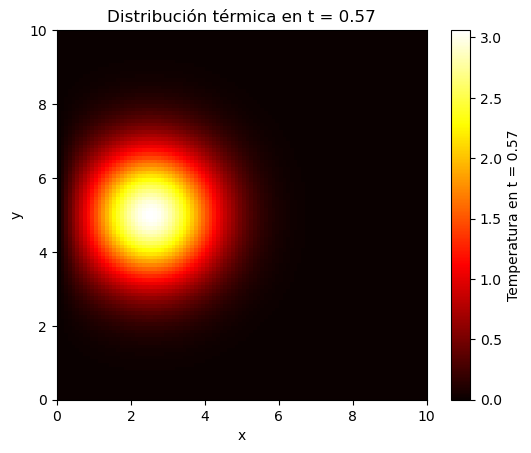

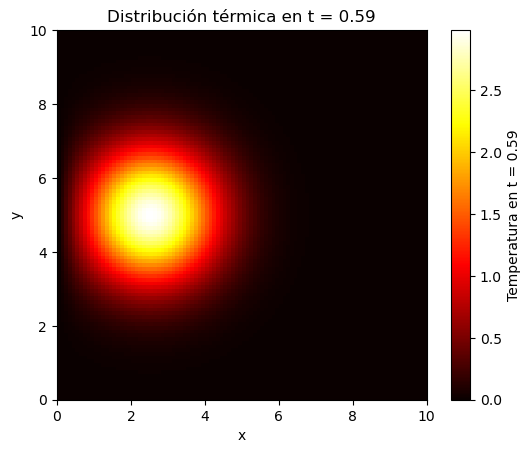

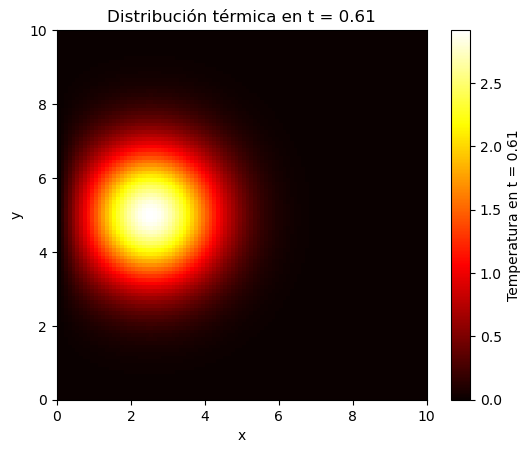

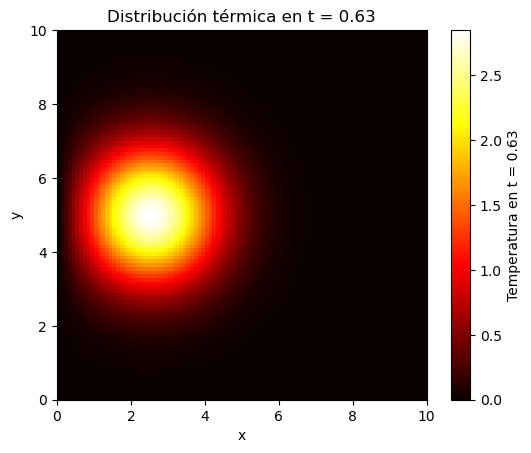

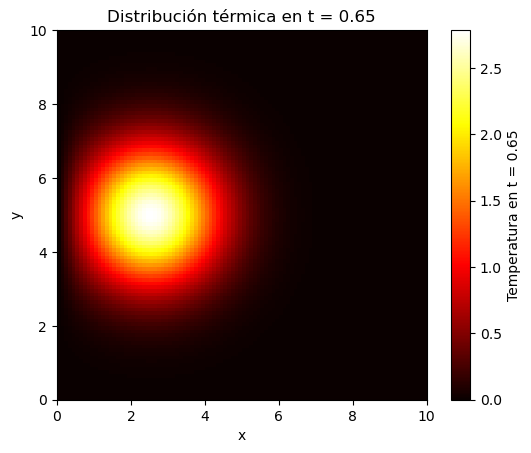

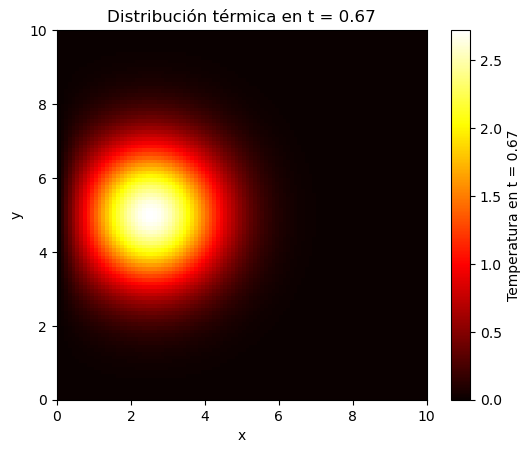

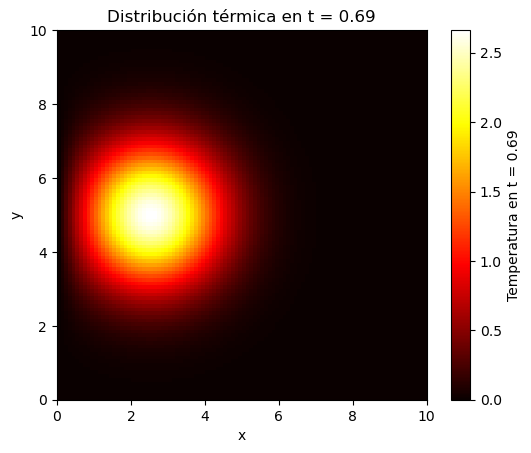

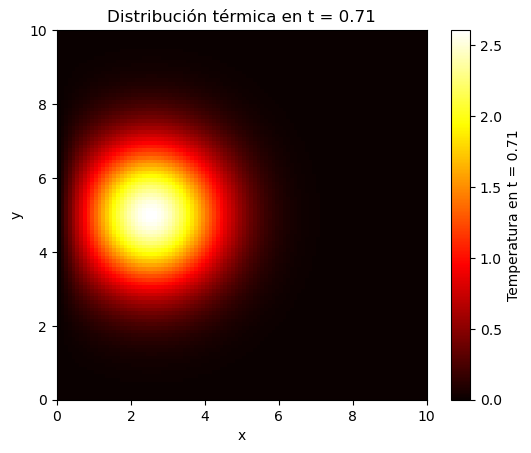

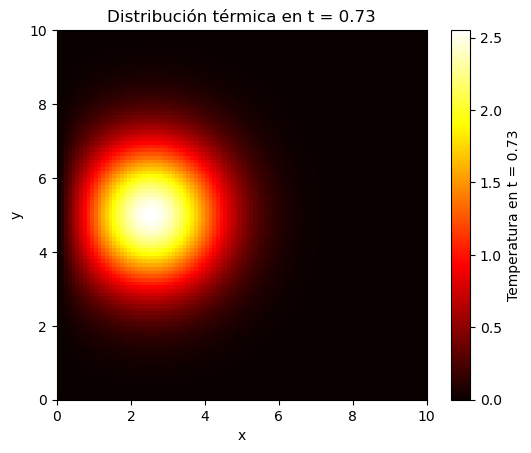

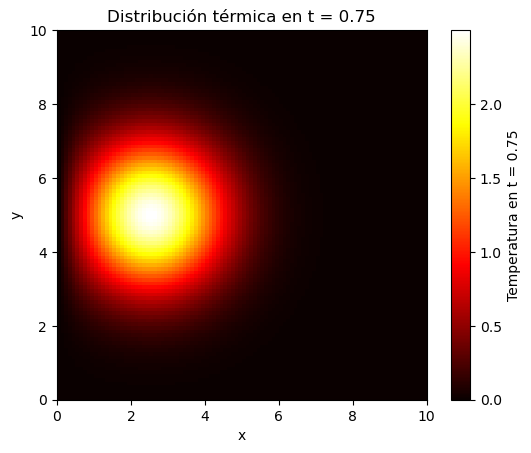

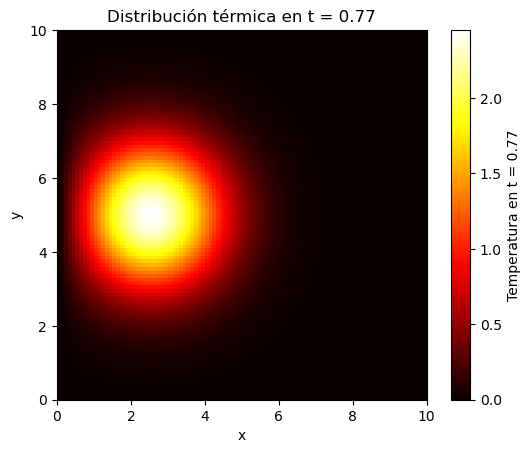

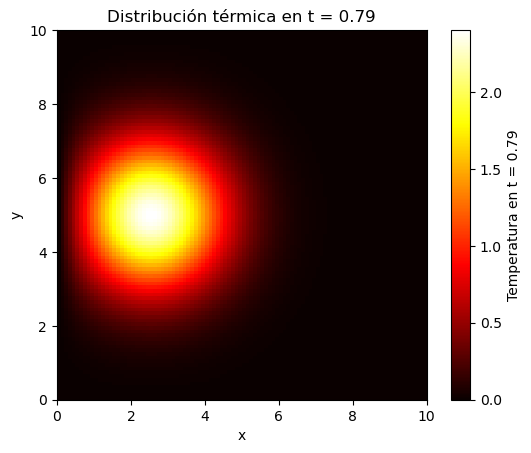

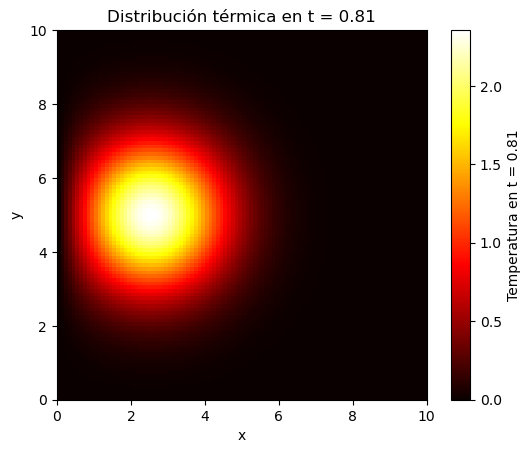

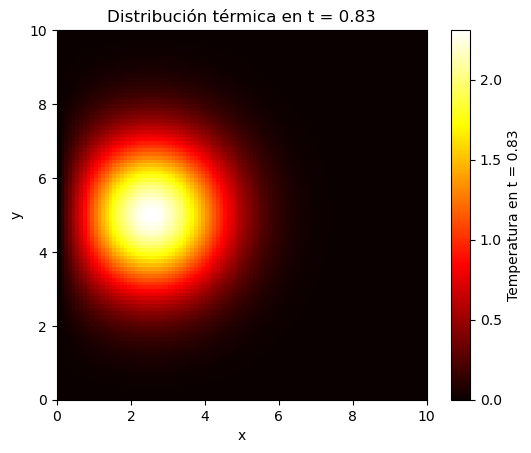

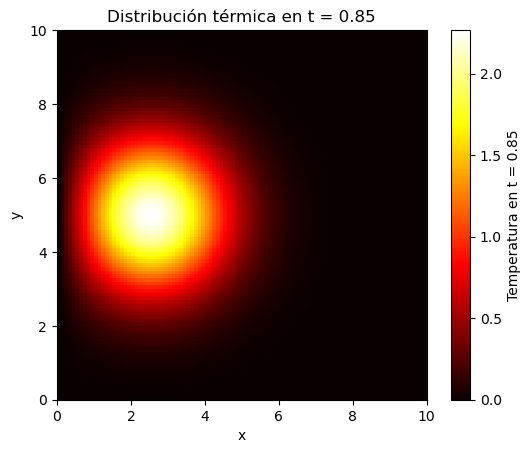

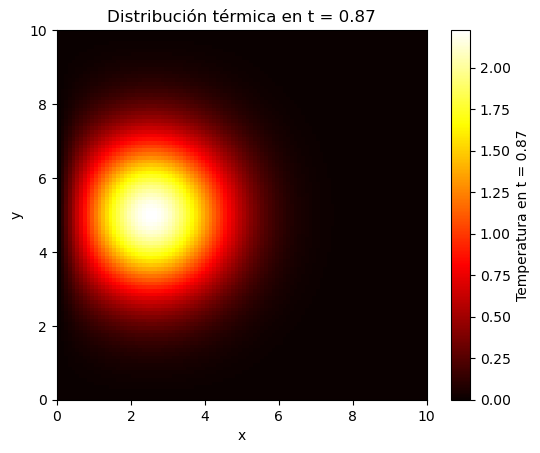

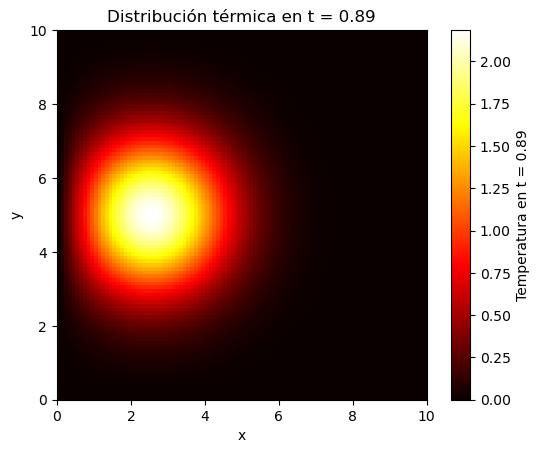

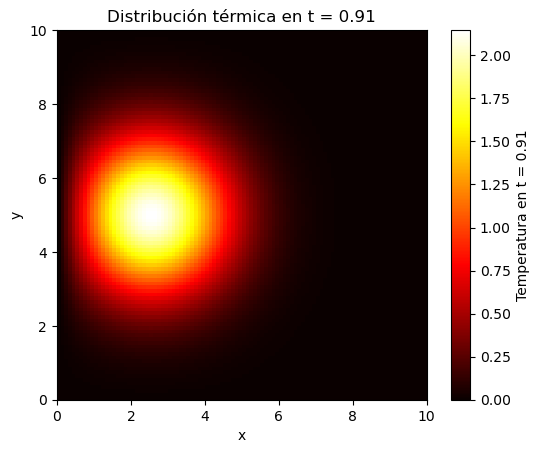

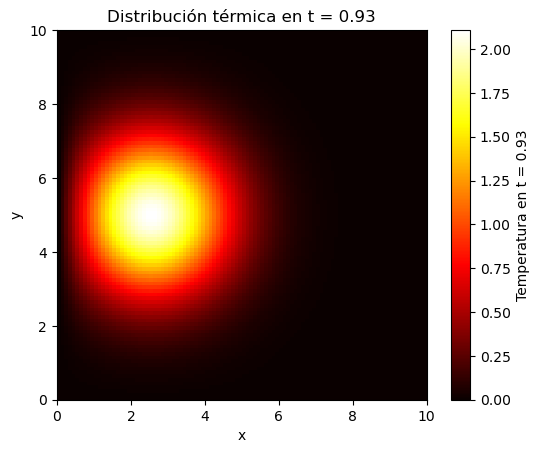

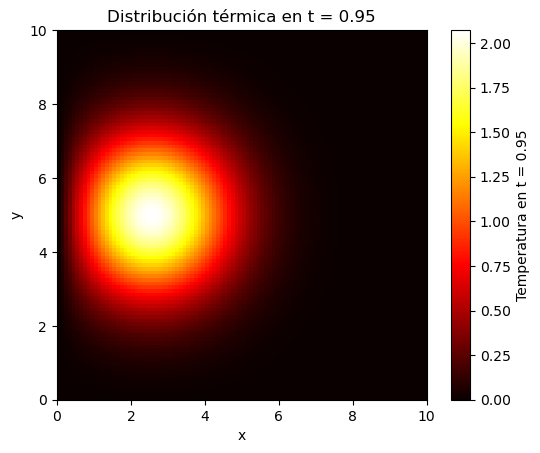

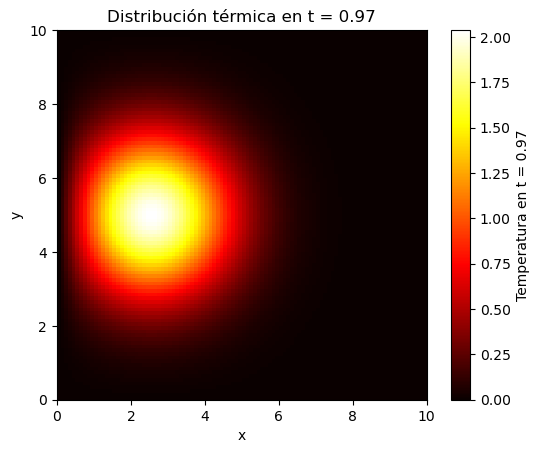

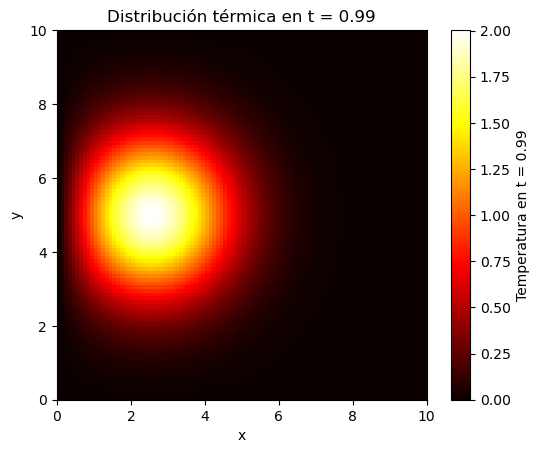

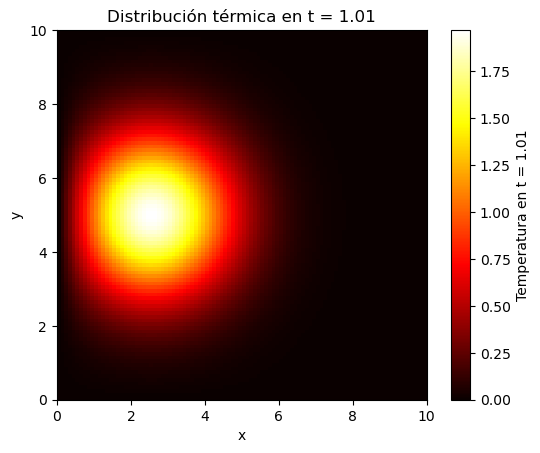

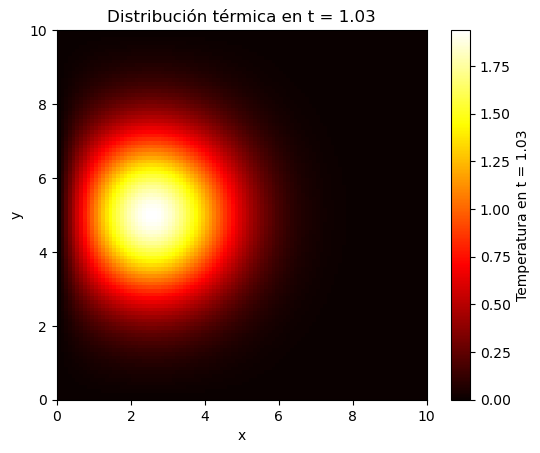

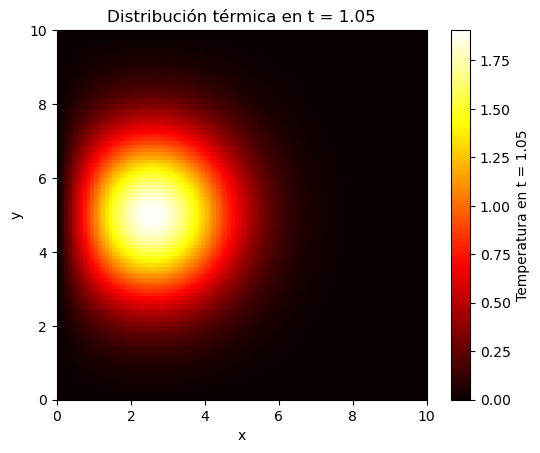

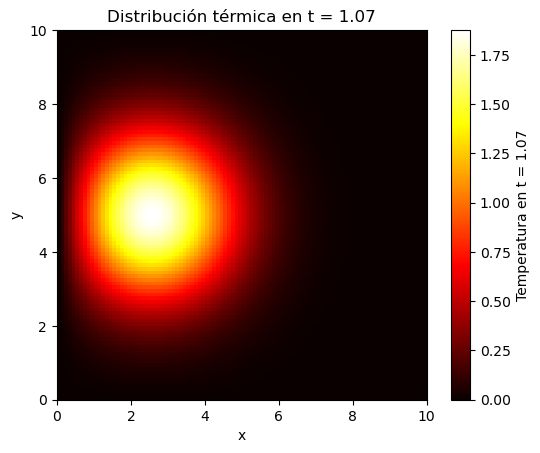

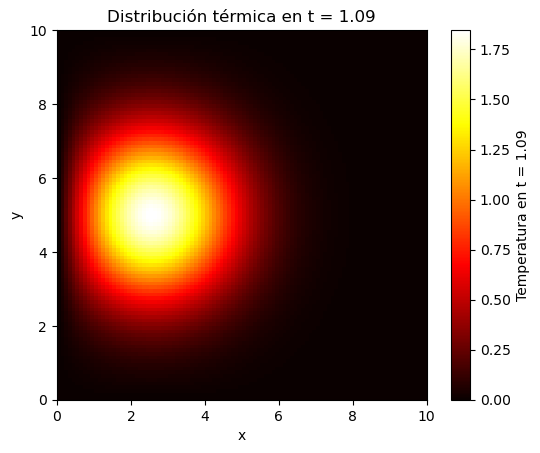

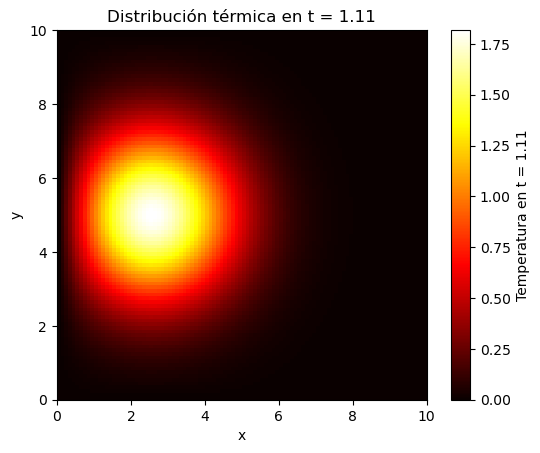

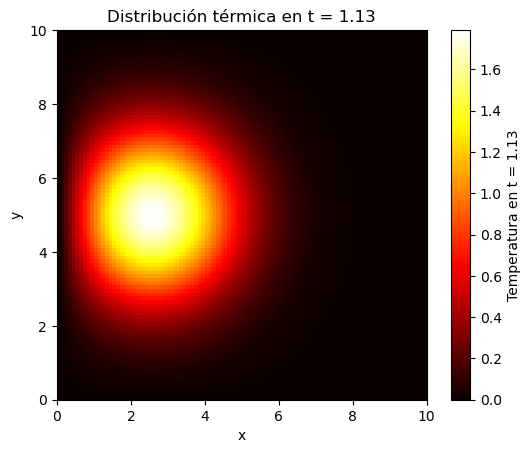

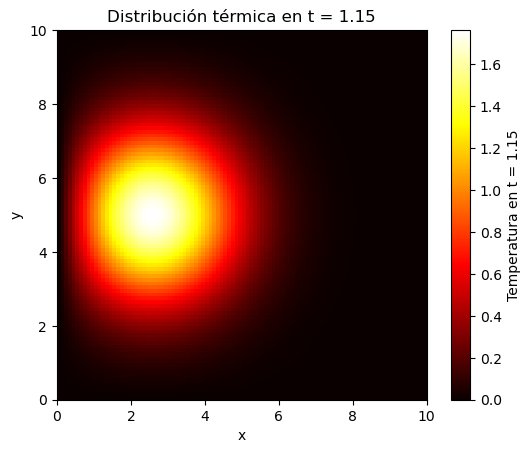

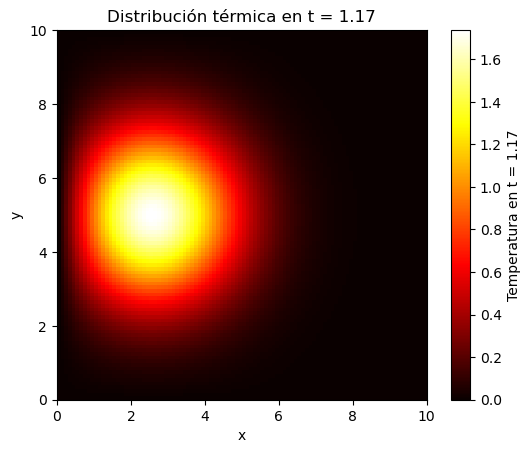

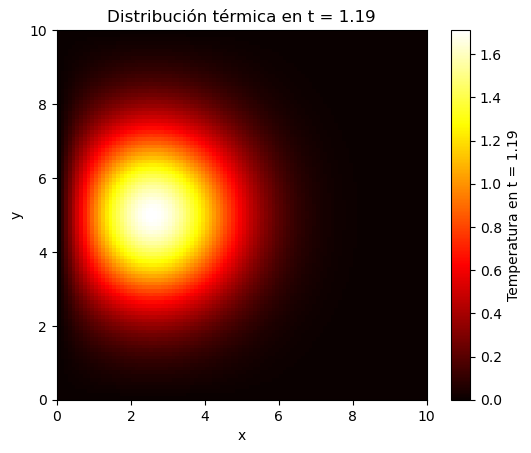

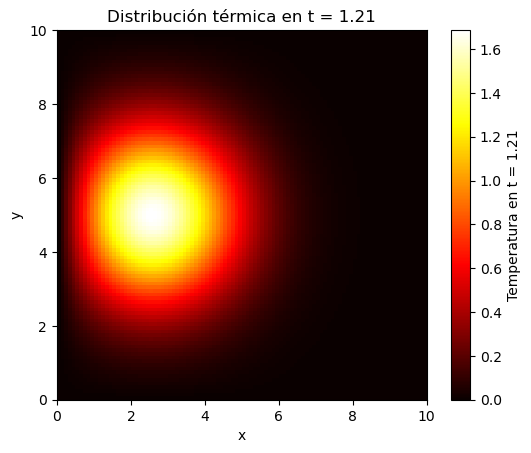

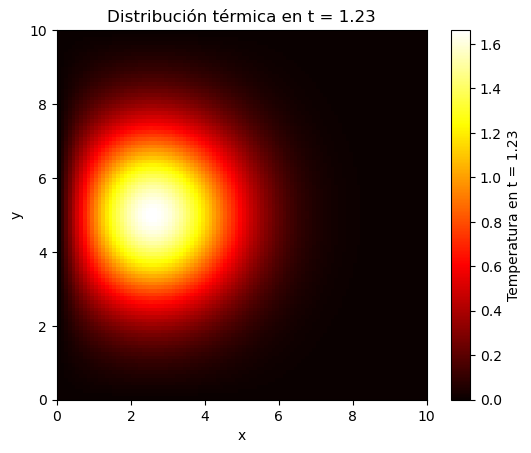

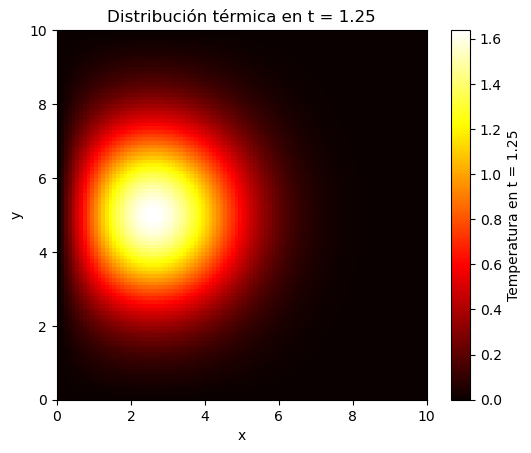

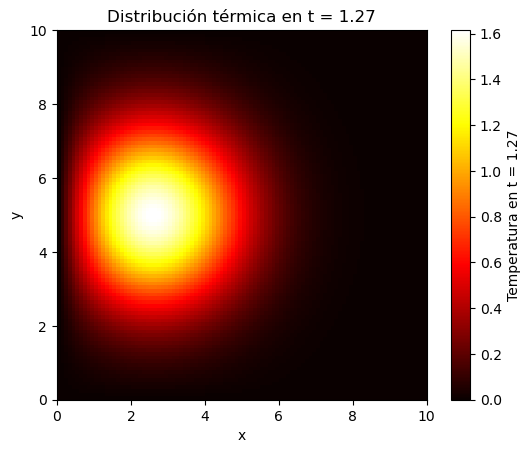

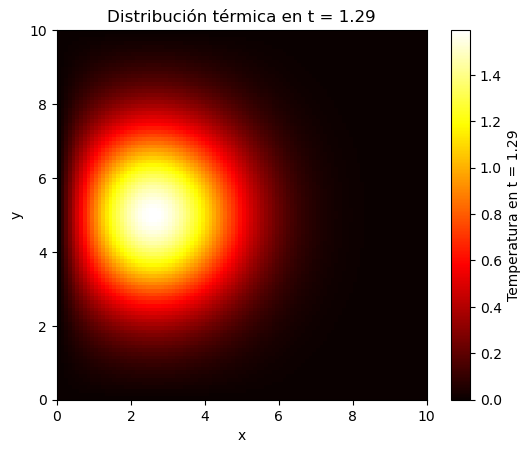

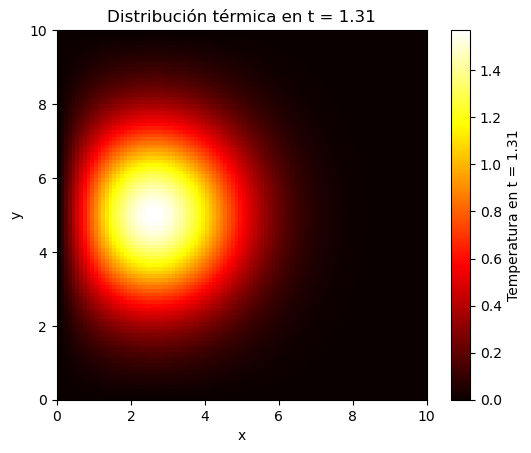

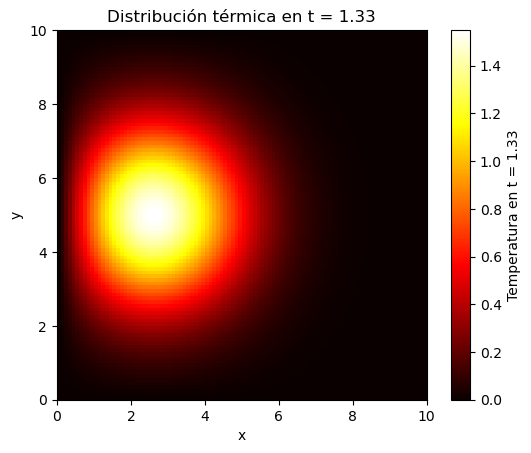

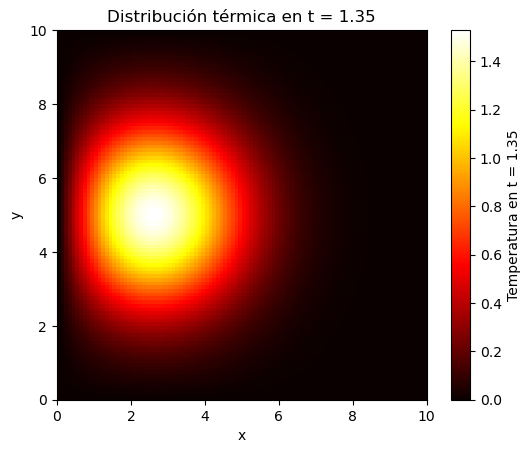

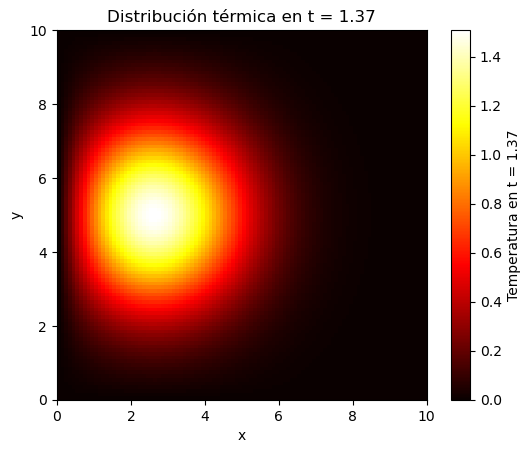

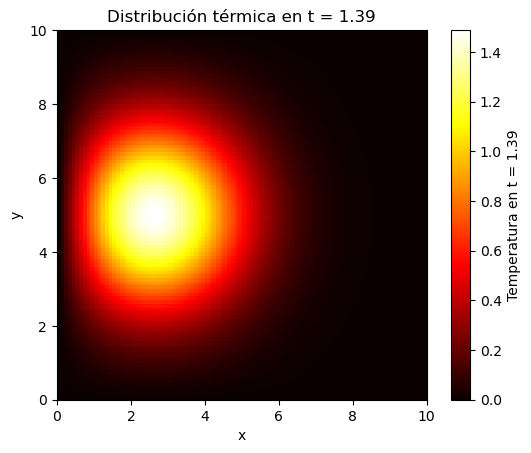

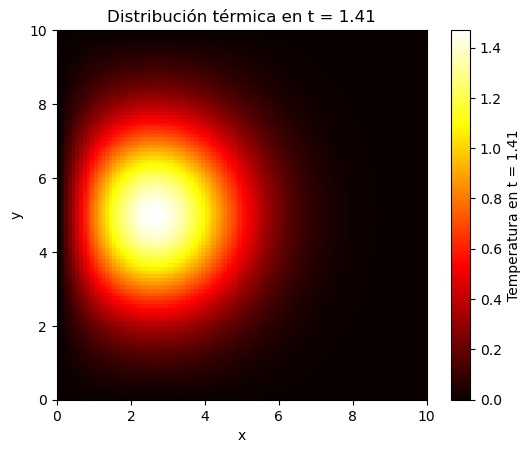

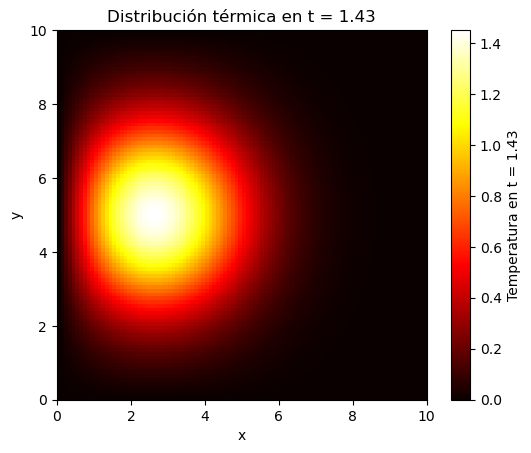

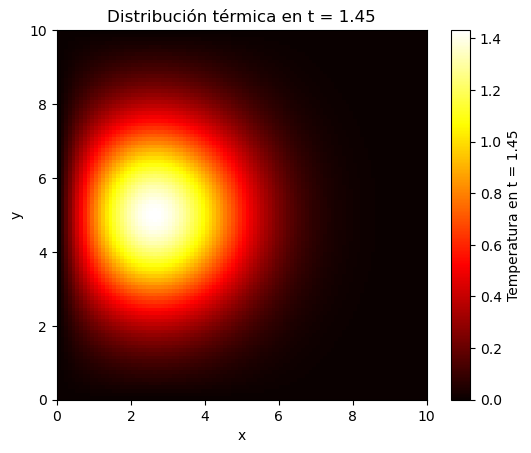

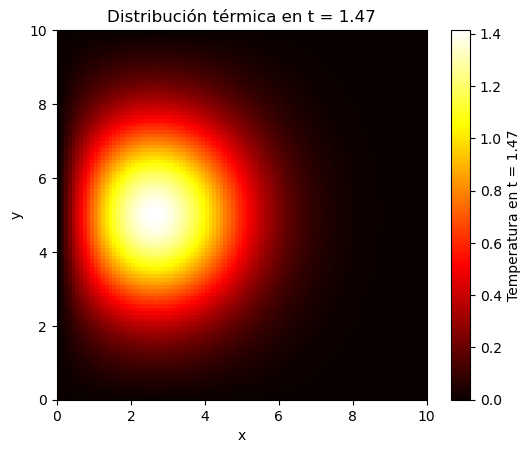

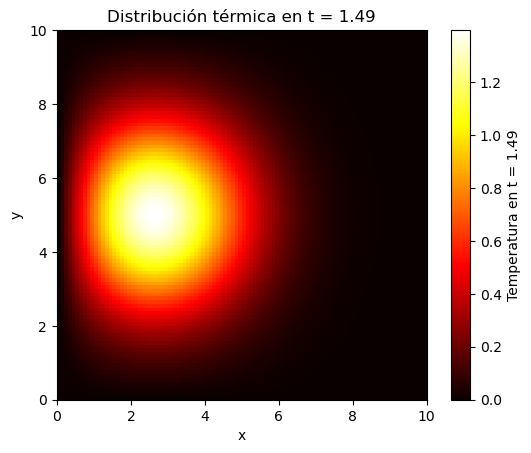

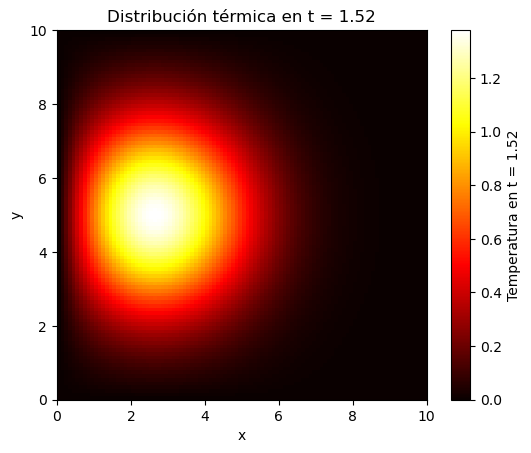

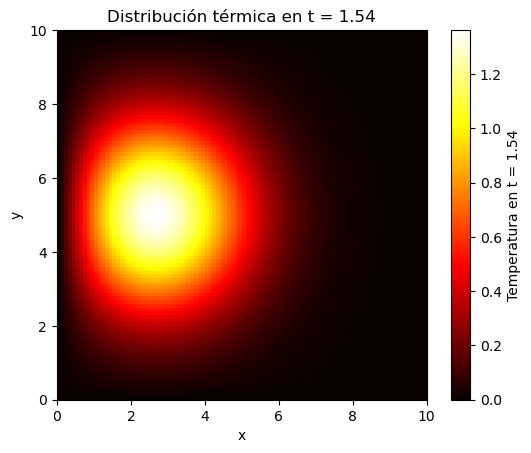

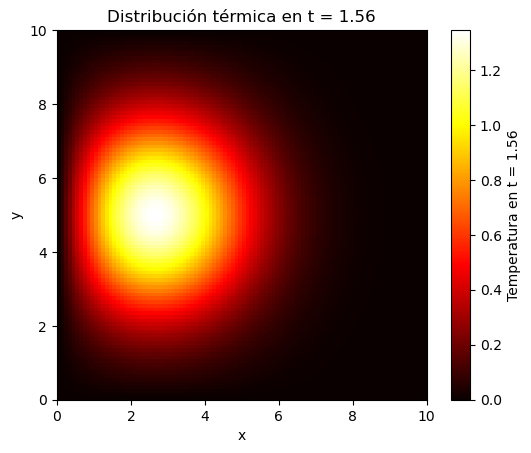

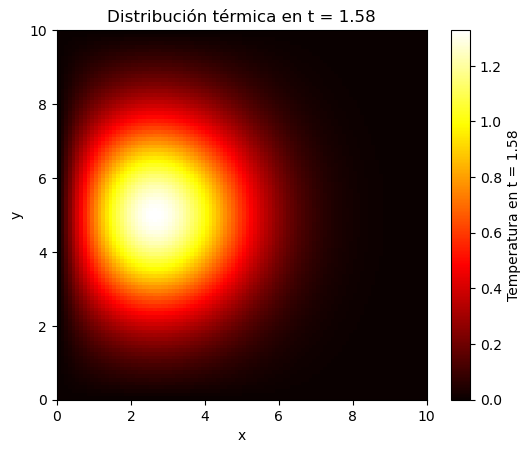

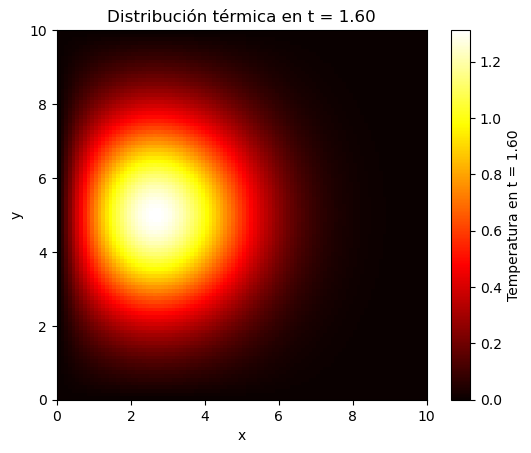

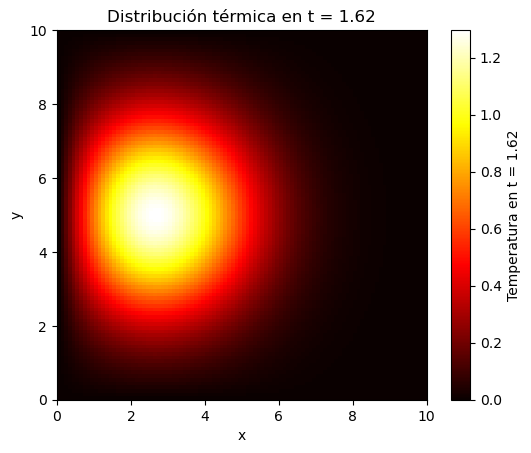

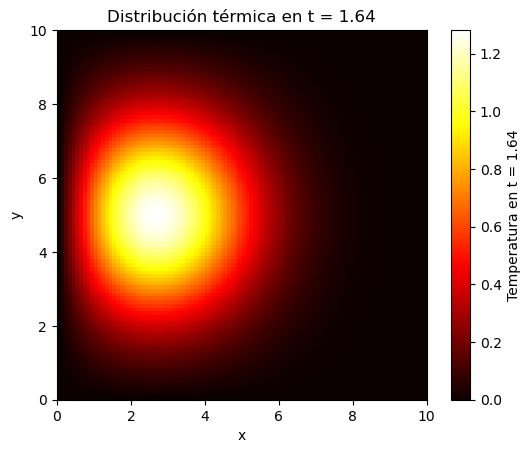

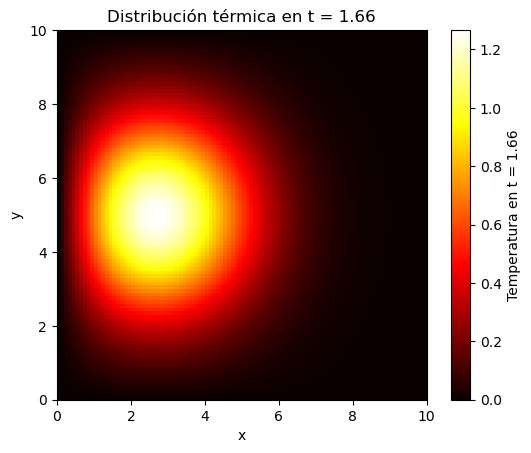

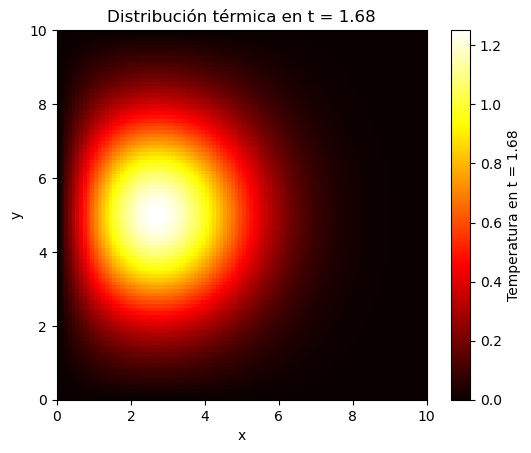

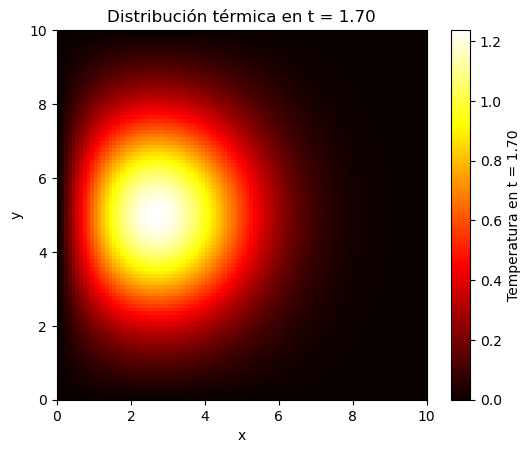

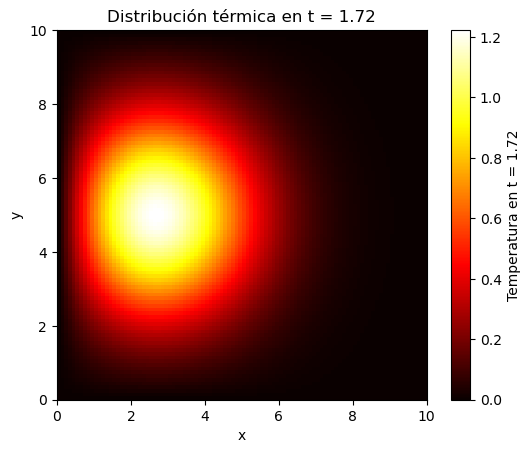

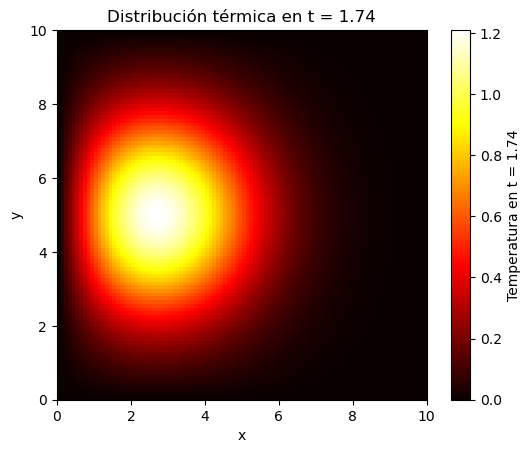

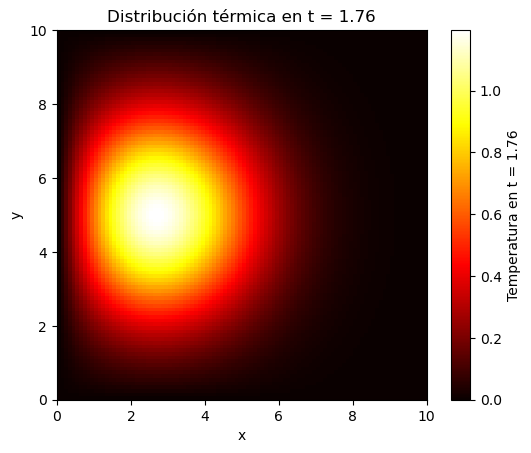

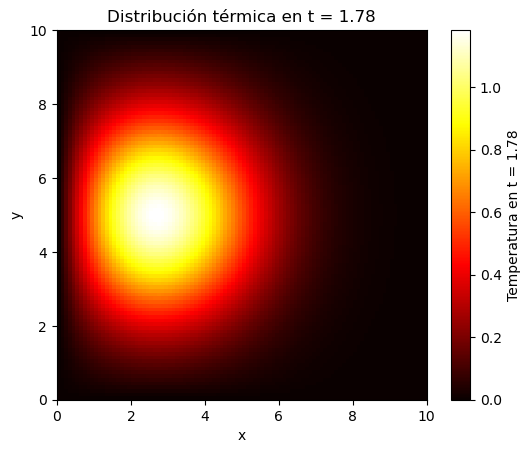

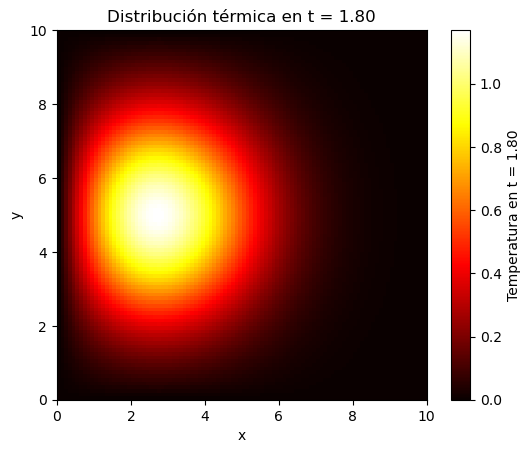

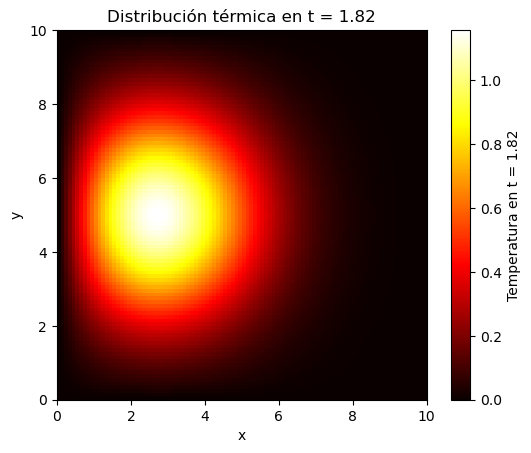

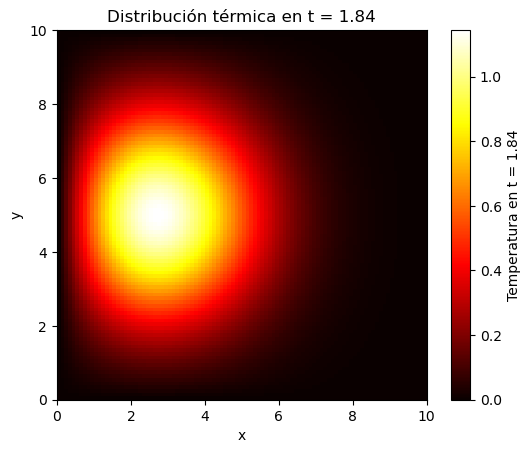

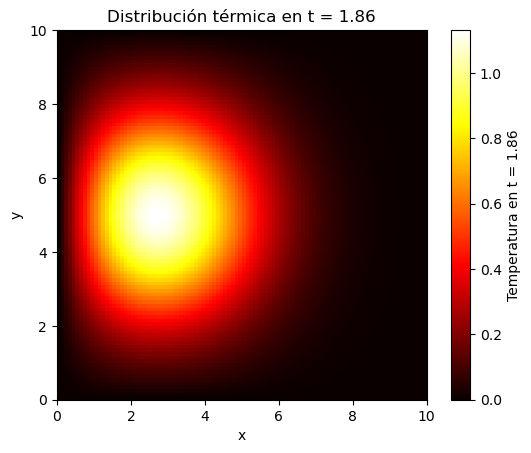

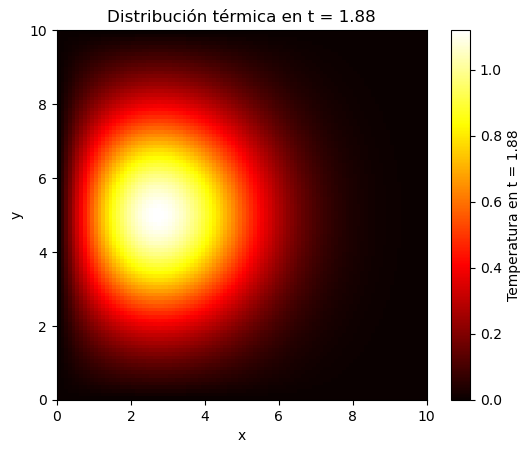

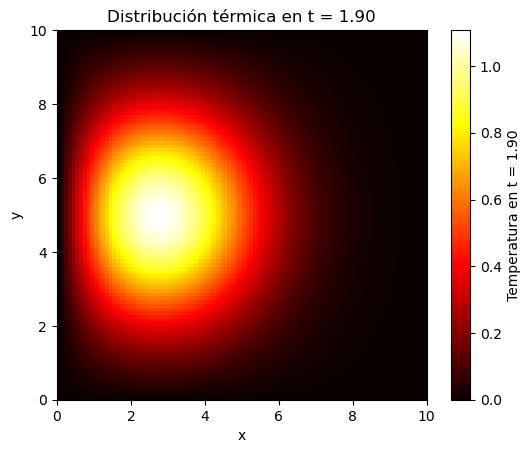

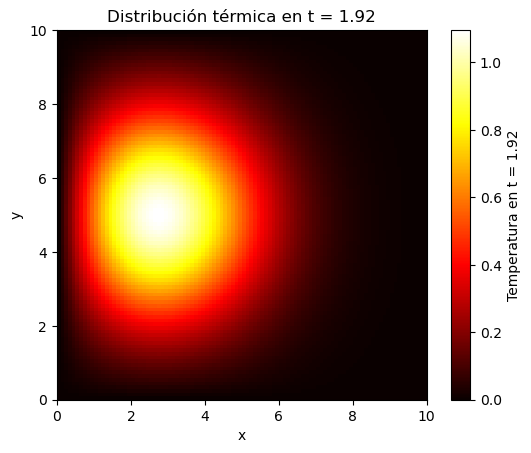

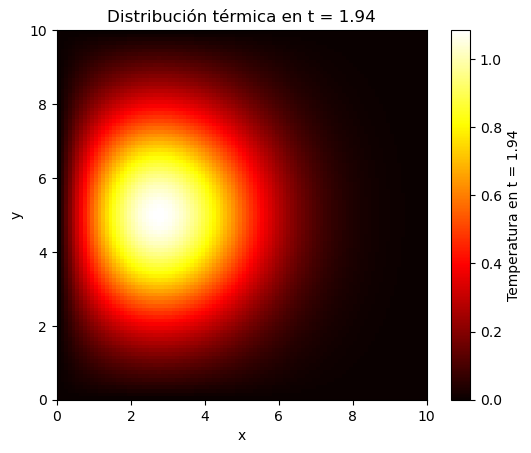

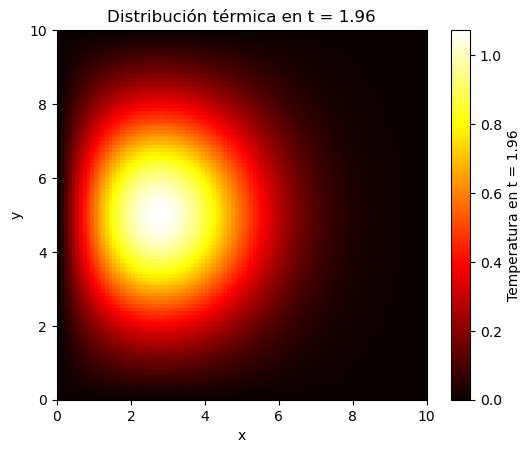

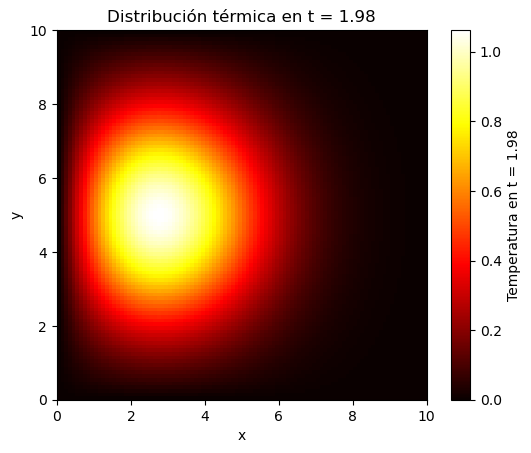

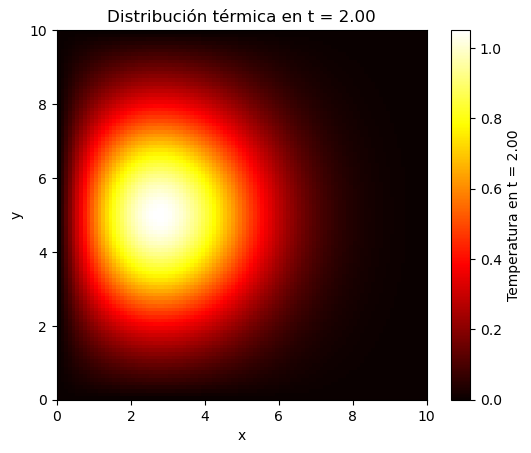

In [7]:
for t_index in range(1, N_PUNTOS_T):
    plt.imshow(U[:, :, t_index], cmap="hot", origin="lower", extent=[0, A, 0, B])
    plt.colorbar(label=f"Temperatura en t = {t_vals[t_index]:.2f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Distribución térmica en t = {t_vals[t_index]:.2f}")
    plt.show()